In [2492]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import datetime
import json
import numpy as np

In [2493]:
# Import stock prices of involved companies
global_stock_prices_df = pd.read_csv('/Users/connor.stevens/Documents/global_stock_data.csv')
global_stock_prices_df.head()

,gvkey,iid,datadate,conm,cshoc,cshtrd,prccd,trfd,isin
0,9818,01W,2015-10-01,SONY GROUP CORPORATION,1.262162e+09,12208200.0,2996.0,1.273351,JP3435000009
1,9818,01W,2015-10-02,SONY GROUP CORPORATION,1.262162e+09,9628600.0,3094.0,1.273351,JP3435000009
2,9818,01W,2015-10-05,SONY GROUP CORPORATION,1.262162e+09,8807600.0,3142.0,1.273351,JP3435000009
3,9818,01W,2015-10-06,SONY GROUP CORPORATION,1.262162e+09,6426700.0,3156.0,1.273351,JP3435000009
4,9818,01W,2015-10-07,SONY GROUP CORPORATION,1.262162e+09,6163800.0,3205.0,1.273351,JP3435000009


In [2494]:
us_stock_prices_df = pd.read_csv('/Users/connor.stevens/Documents/us_stock_data.csv')
us_stock_prices_df.head()

,gvkey,iid,datadate,tic,conm,cshoc,cshtrd,prccd,trfd
0,12141,1,2015-10-01,MSFT,MICROSOFT CORP,7.997981e+09,28564790.0,44.61,1.420765
1,12141,1,2015-10-02,MSFT,MICROSOFT CORP,7.997981e+09,41789610.0,45.57,1.420765
2,12141,1,2015-10-05,MSFT,MICROSOFT CORP,7.997981e+09,33546080.0,46.63,1.420765
3,12141,1,2015-10-06,MSFT,MICROSOFT CORP,7.997981e+09,27504360.0,46.75,1.420765
4,12141,1,2015-10-07,MSFT,MICROSOFT CORP,7.997981e+09,27695610.0,46.80,1.420765


In [2495]:
# Get names of invovled companies.
us_stock_prices_df['conm'].unique()

array(['MICROSOFT CORP', 'ELECTRONIC ARTS INC',
       'TAKE-TWO INTERACTIVE SFTWR', 'ACTIVISION BLIZZARD INC'],
      dtype=object)

<Axes: >

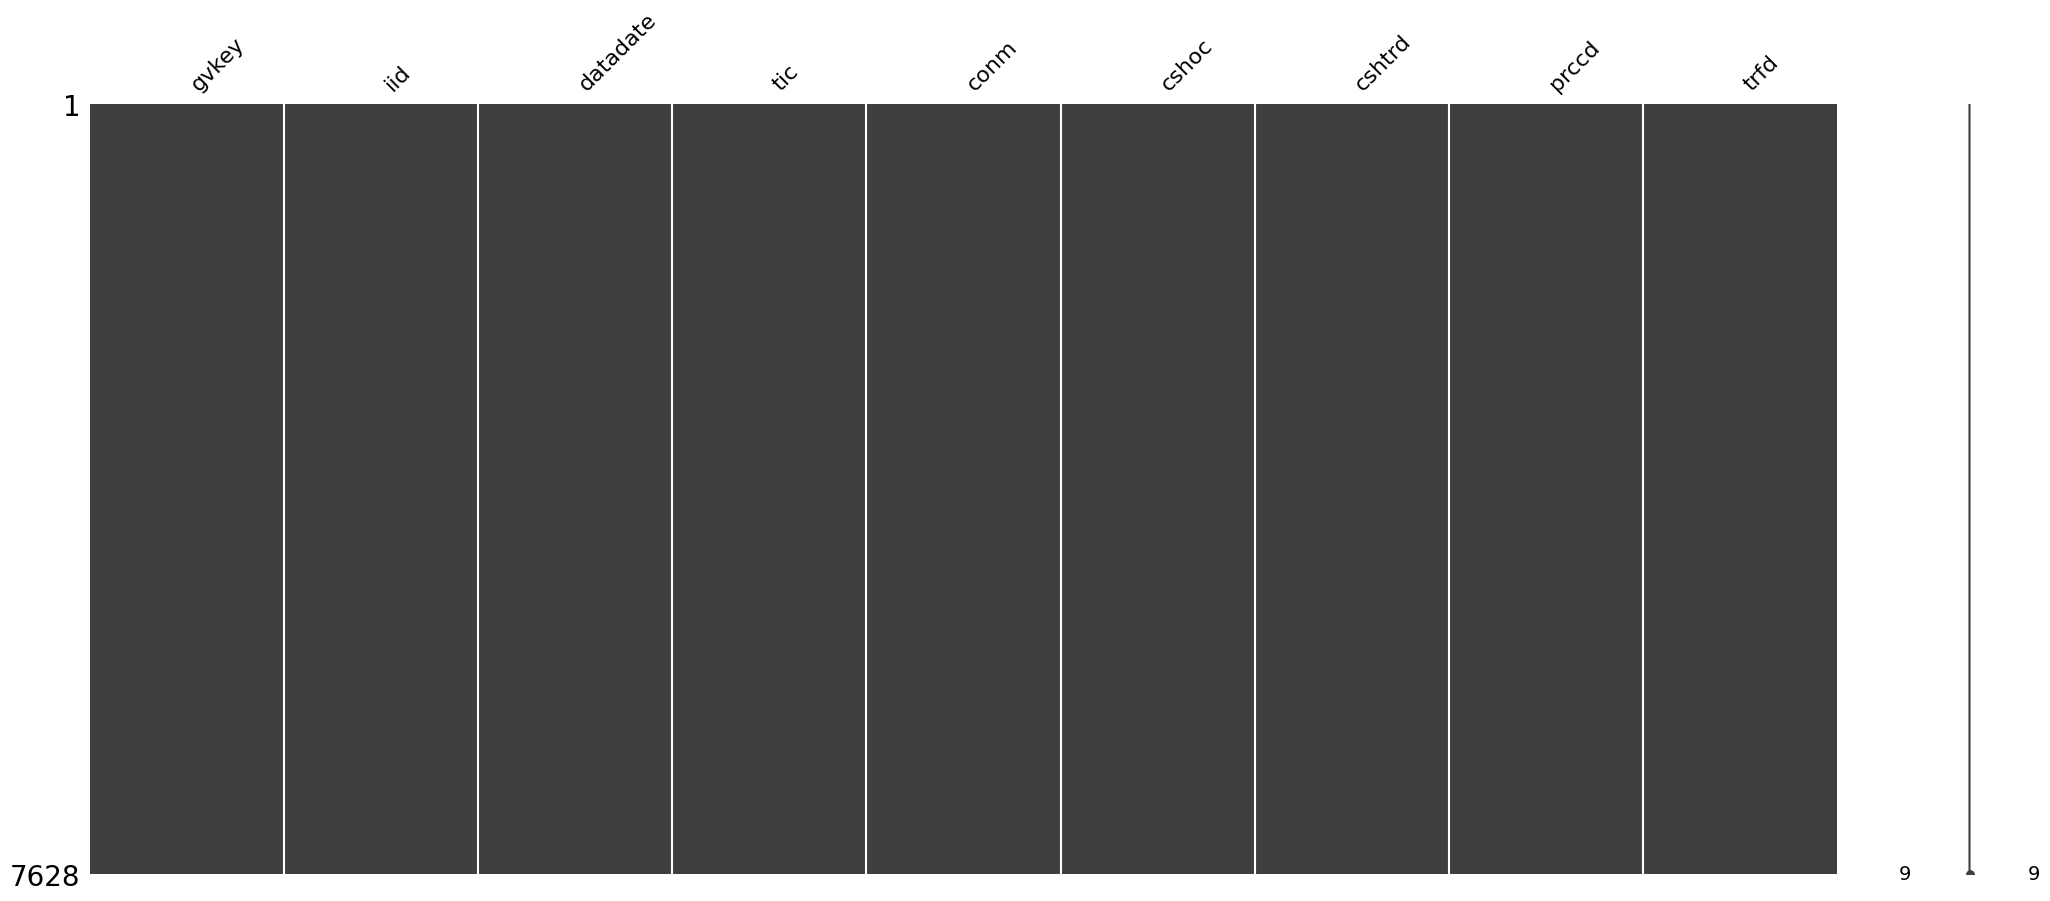

In [2496]:
# Check missing data for us stock prices.
%matplotlib inline

msno.matrix(us_stock_prices_df)

In [2497]:
# Get names of involved companies.
global_stock_prices_df['conm'].unique()

array(['SONY GROUP CORPORATION', 'NINTENDO CO LTD',
       'KONAMI GROUP CORPORATION', 'CAPCOM CO LTD',
       'BANDAI NAMCO HOLDINGS INC', 'KOEI TECMO HOLDINGS CO LTD',
       'UBI SOFT ENTERTAINMENT SA', 'SQUARE ENIX HLDGS CO LTD',
       'KADOKAWA CORPORATION', 'SEGA SAMMY HLDGS INC', 'STARBREEZE AB',
       'DIGITAL BROS SPA', 'CD PROJEKT SA', "YUKE'S CO LTD",
       'MARVELOUS INC', 'NIHON FALCOM CORP', 'FUNCOM SE', 'NEOWIZ',
       'NIPPON ICHI SOFTWARE INC', 'CI GAMES SE', '11 BIT STUDIOS SA',
       'BLOOBER TEAM SA', 'FRONTIER DEVELOPMENTS PLC',
       'FOCUS ENTERTAINMENT SOCIETE', 'FURYU CORP',
       'PARADOX INTERACTIVE AB', 'FOREVER ENTERTAINMENT SA', 'PLAYWAY SA',
       'ARTIFEX MUNDI SA', 'REMEDY', "DON'T NOD ENTR SA",
       'TEAM17 GROUP PLC', 'ZORDIX AB', 'NACON SA', 'GAMES OPERATORS SA',
       'ALL IN GAMES SA', 'THUNDERFUL GROUP AB', 'KRAFTO INC',
       'DEVOLVER DIGITAL INC', 'BIG CHEESE STUDIO SPOLKA'], dtype=object)

<Axes: >

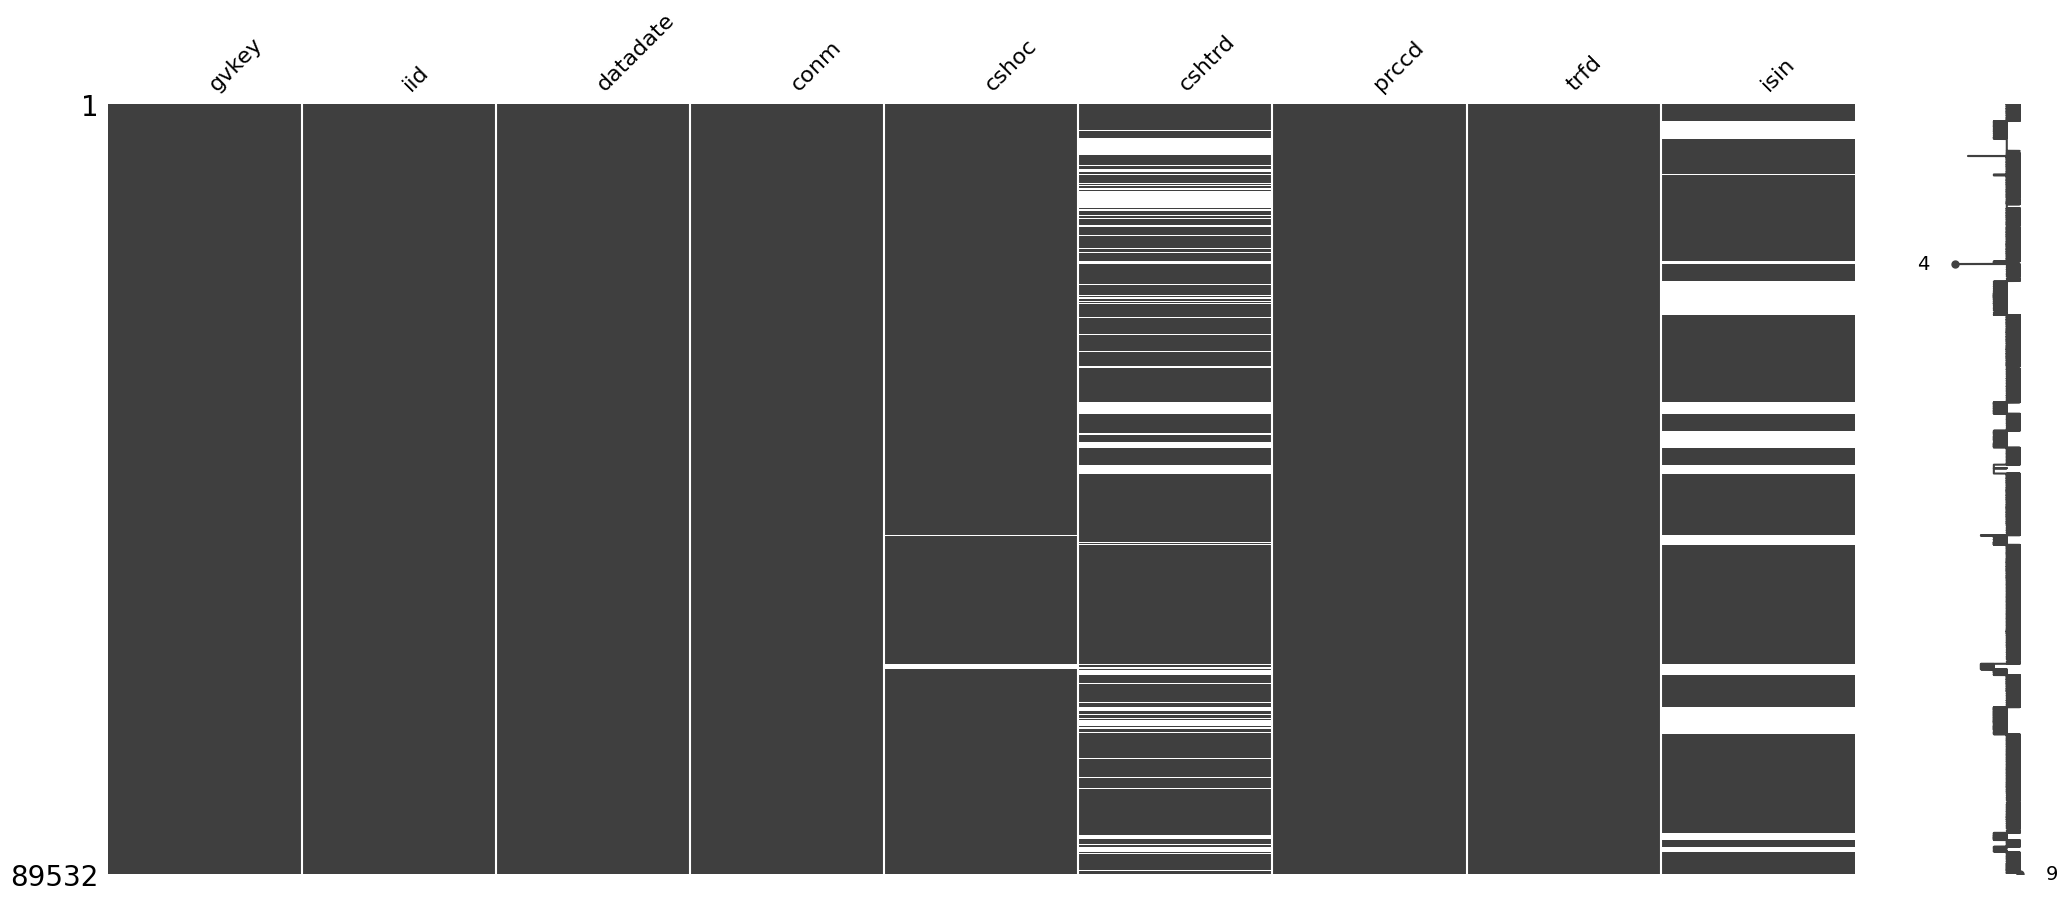

In [2498]:
# Check missing data for global stock prices.
%matplotlib inline

msno.matrix(global_stock_prices_df)

The global stock data has many missing values for isin, but these are known and stored in companies.json. Use this to fill out the isin values.

In [2499]:
# Get all companies data.
with open('companies.json') as json_file:
  companies_list = json.load(json_file)

In [2500]:
# Create function for filling in missing isin values.
def fill_missing_isin(company_name_input):
    
    for company in companies_list:
        if company['company_name'] == company_name_input:
            return company['stock_id']
        
        else:
            continue

In [2501]:
# Fill in missing isin values in global_stock_prices_df
global_stock_prices_df['isin'] = global_stock_prices_df['conm'].map(fill_missing_isin)
global_stock_prices_df.head()

,gvkey,iid,datadate,conm,cshoc,cshtrd,prccd,trfd,isin
0,9818,01W,2015-10-01,SONY GROUP CORPORATION,1.262162e+09,12208200.0,2996.0,1.273351,JP3435000009
1,9818,01W,2015-10-02,SONY GROUP CORPORATION,1.262162e+09,9628600.0,3094.0,1.273351,JP3435000009
2,9818,01W,2015-10-05,SONY GROUP CORPORATION,1.262162e+09,8807600.0,3142.0,1.273351,JP3435000009
3,9818,01W,2015-10-06,SONY GROUP CORPORATION,1.262162e+09,6426700.0,3156.0,1.273351,JP3435000009
4,9818,01W,2015-10-07,SONY GROUP CORPORATION,1.262162e+09,6163800.0,3205.0,1.273351,JP3435000009


<Axes: >

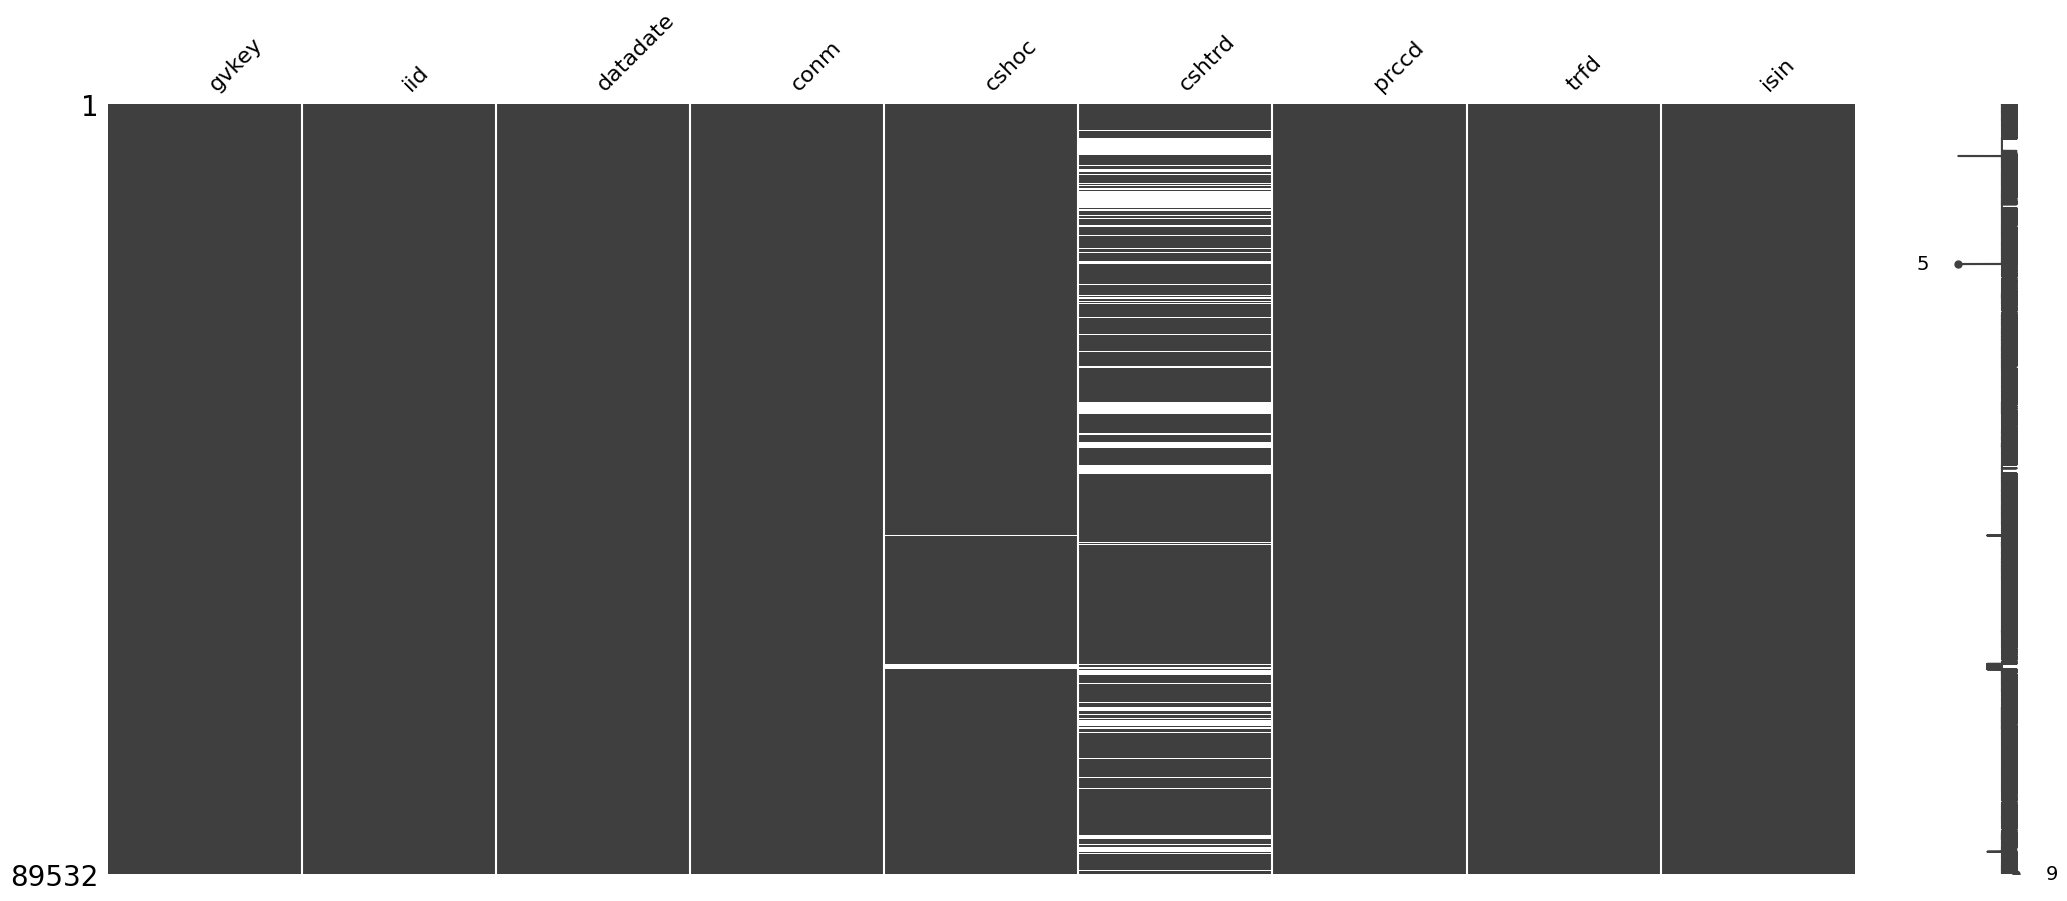

In [2502]:
# Check missing data for global stock prices after filling in missing values
%matplotlib inline

msno.matrix(global_stock_prices_df)

Need to join the US and Global datasets together before continuing. Begin by changing the name of `isin` column in global and `tic` in us to `stock_id`.

In [2503]:
# Make a column called stock_id in us dataset and copy gvkey into it.
us_stock_prices_df['stock_id'] = us_stock_prices_df['gvkey']
us_stock_prices_df.head()

,gvkey,iid,datadate,tic,conm,cshoc,cshtrd,prccd,trfd,stock_id
0,12141,1,2015-10-01,MSFT,MICROSOFT CORP,7.997981e+09,28564790.0,44.61,1.420765,12141
1,12141,1,2015-10-02,MSFT,MICROSOFT CORP,7.997981e+09,41789610.0,45.57,1.420765,12141
2,12141,1,2015-10-05,MSFT,MICROSOFT CORP,7.997981e+09,33546080.0,46.63,1.420765,12141
3,12141,1,2015-10-06,MSFT,MICROSOFT CORP,7.997981e+09,27504360.0,46.75,1.420765,12141
4,12141,1,2015-10-07,MSFT,MICROSOFT CORP,7.997981e+09,27695610.0,46.80,1.420765,12141


In [2504]:
# Rename isin and tic to stock_id.
global_stock_prices_df = global_stock_prices_df.rename(columns={'isin': 'stock_id'})
global_stock_prices_df.head()


,gvkey,iid,datadate,conm,cshoc,cshtrd,prccd,trfd,stock_id
0,9818,01W,2015-10-01,SONY GROUP CORPORATION,1.262162e+09,12208200.0,2996.0,1.273351,JP3435000009
1,9818,01W,2015-10-02,SONY GROUP CORPORATION,1.262162e+09,9628600.0,3094.0,1.273351,JP3435000009
2,9818,01W,2015-10-05,SONY GROUP CORPORATION,1.262162e+09,8807600.0,3142.0,1.273351,JP3435000009
3,9818,01W,2015-10-06,SONY GROUP CORPORATION,1.262162e+09,6426700.0,3156.0,1.273351,JP3435000009
4,9818,01W,2015-10-07,SONY GROUP CORPORATION,1.262162e+09,6163800.0,3205.0,1.273351,JP3435000009


In [2505]:
# Drop tic column as it does not exist in the global dataset. Removing in necessary before joining the datasets.
us_stock_prices_df = us_stock_prices_df.drop('tic', axis=1)
us_stock_prices_df.head()

,gvkey,iid,datadate,conm,cshoc,cshtrd,prccd,trfd,stock_id
0,12141,1,2015-10-01,MICROSOFT CORP,7.997981e+09,28564790.0,44.61,1.420765,12141
1,12141,1,2015-10-02,MICROSOFT CORP,7.997981e+09,41789610.0,45.57,1.420765,12141
2,12141,1,2015-10-05,MICROSOFT CORP,7.997981e+09,33546080.0,46.63,1.420765,12141
3,12141,1,2015-10-06,MICROSOFT CORP,7.997981e+09,27504360.0,46.75,1.420765,12141
4,12141,1,2015-10-07,MICROSOFT CORP,7.997981e+09,27695610.0,46.80,1.420765,12141


Next, concatenate the two datasets into a single dataset now that they both have the same column names.

In [2506]:
# List of dataframes to concatenate.
dataframes = [global_stock_prices_df, us_stock_prices_df]
stock_data_df = pd.concat(dataframes)
stock_data_df.head()

,gvkey,iid,datadate,conm,cshoc,cshtrd,prccd,trfd,stock_id
0,9818,01W,2015-10-01,SONY GROUP CORPORATION,1.262162e+09,12208200.0,2996.0,1.273351,JP3435000009
1,9818,01W,2015-10-02,SONY GROUP CORPORATION,1.262162e+09,9628600.0,3094.0,1.273351,JP3435000009
2,9818,01W,2015-10-05,SONY GROUP CORPORATION,1.262162e+09,8807600.0,3142.0,1.273351,JP3435000009
3,9818,01W,2015-10-06,SONY GROUP CORPORATION,1.262162e+09,6426700.0,3156.0,1.273351,JP3435000009
4,9818,01W,2015-10-07,SONY GROUP CORPORATION,1.262162e+09,6163800.0,3205.0,1.273351,JP3435000009


In [2507]:
# Check the number of unique company names to make sure they are all there now.
print(len(stock_data_df['conm'].unique()))
print(stock_data_df['conm'].unique())

44
['SONY GROUP CORPORATION' 'NINTENDO CO LTD' 'KONAMI GROUP CORPORATION'
 'CAPCOM CO LTD' 'BANDAI NAMCO HOLDINGS INC' 'KOEI TECMO HOLDINGS CO LTD'
 'UBI SOFT ENTERTAINMENT SA' 'SQUARE ENIX HLDGS CO LTD'
 'KADOKAWA CORPORATION' 'SEGA SAMMY HLDGS INC' 'STARBREEZE AB'
 'DIGITAL BROS SPA' 'CD PROJEKT SA' "YUKE'S CO LTD" 'MARVELOUS INC'
 'NIHON FALCOM CORP' 'FUNCOM SE' 'NEOWIZ' 'NIPPON ICHI SOFTWARE INC'
 'CI GAMES SE' '11 BIT STUDIOS SA' 'BLOOBER TEAM SA'
 'FRONTIER DEVELOPMENTS PLC' 'FOCUS ENTERTAINMENT SOCIETE' 'FURYU CORP'
 'PARADOX INTERACTIVE AB' 'FOREVER ENTERTAINMENT SA' 'PLAYWAY SA'
 'ARTIFEX MUNDI SA' 'REMEDY' "DON'T NOD ENTR SA" 'TEAM17 GROUP PLC'
 'ZORDIX AB' 'NACON SA' 'GAMES OPERATORS SA' 'ALL IN GAMES SA'
 'THUNDERFUL GROUP AB' 'KRAFTO INC' 'DEVOLVER DIGITAL INC'
 'BIG CHEESE STUDIO SPOLKA' 'MICROSOFT CORP' 'ELECTRONIC ARTS INC'
 'TAKE-TWO INTERACTIVE SFTWR' 'ACTIVISION BLIZZARD INC']


In [2508]:
# Rename single dataframe columns to be more self-explanatory.
stock_data_df = stock_data_df.rename(columns={
    'datadate': 'date',
    'conm': 'company_name',
    'cshoc': 'shares_outstanding',
    'cshtrd': 'trading_volume',
    'prccd': 'closing_price',
    'trfd': 'total_return_factor'
    })

In [2509]:
# Convert stock_data_df date column to datetime.
stock_data_df['date'] = pd.to_datetime(stock_data_df['date'])
stock_data_df.head()

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,total_return_factor,stock_id
0,9818,01W,2015-10-01,SONY GROUP CORPORATION,1.262162e+09,12208200.0,2996.0,1.273351,JP3435000009
1,9818,01W,2015-10-02,SONY GROUP CORPORATION,1.262162e+09,9628600.0,3094.0,1.273351,JP3435000009
2,9818,01W,2015-10-05,SONY GROUP CORPORATION,1.262162e+09,8807600.0,3142.0,1.273351,JP3435000009
3,9818,01W,2015-10-06,SONY GROUP CORPORATION,1.262162e+09,6426700.0,3156.0,1.273351,JP3435000009
4,9818,01W,2015-10-07,SONY GROUP CORPORATION,1.262162e+09,6163800.0,3205.0,1.273351,JP3435000009


<Axes: >

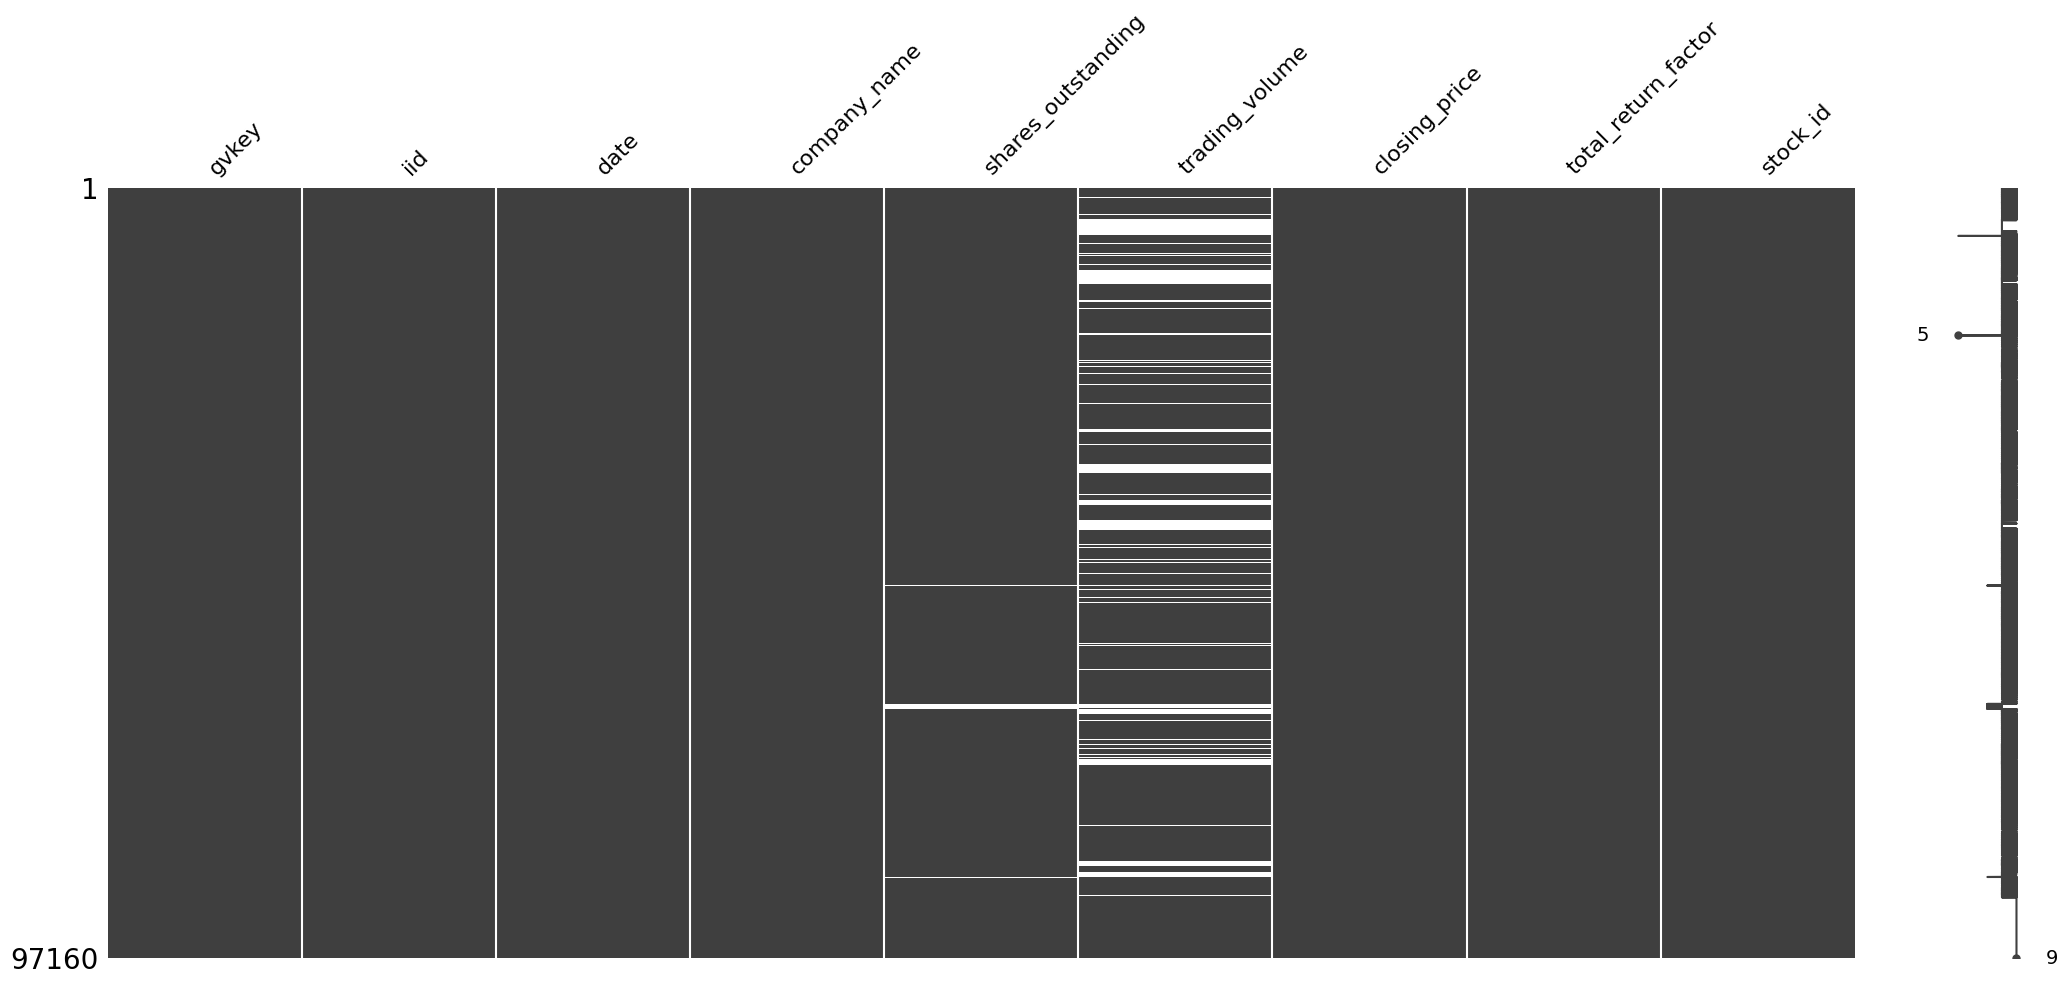

In [2510]:
# Check how much missing data is present in the combined dataset.
# Plot missing data.
%matplotlib inline

msno.matrix(stock_data_df)

There is data missing for shares outstanding, trading volume and stock_id, this needs to be investigated further.

In [2511]:
stock_data_df[stock_data_df['shares_outstanding'].isna()]

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,total_return_factor,stock_id
6046,9818,94W,2020-03-27,SONY GROUP CORPORATION,NaN,NaN,NaN,NaN,JP3435000009
6047,9818,94W,2020-09-28,SONY GROUP CORPORATION,NaN,NaN,NaN,NaN,JP3435000009
6048,9818,94W,2021-03-29,SONY GROUP CORPORATION,NaN,NaN,NaN,NaN,JP3435000009
6049,9818,94W,2021-09-28,SONY GROUP CORPORATION,NaN,NaN,NaN,NaN,JP3435000009
6050,9818,94W,2022-03-29,SONY GROUP CORPORATION,NaN,NaN,NaN,NaN,JP3435000009
...,...,...,...,...,...,...,...,...,...
87019,343796,01W,2020-10-05,ALL IN GAMES SA,NaN,12409.0,22.9,1.022222,PLSNTFG00017
87020,343796,01W,2020-10-06,ALL IN GAMES SA,NaN,12584.0,23.0,1.022222,PLSNTFG00017
87021,343796,01W,2020-10-07,ALL IN GAMES SA,NaN,6582.0,22.8,1.022222,PLSNTFG00017
87022,343796,01W,2020-10-08,ALL IN GAMES SA,NaN,23621.0,22.7,1.022222,PLSNTFG00017


In [2512]:
stock_data_df[stock_data_df['trading_volume'].isna()]

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,total_return_factor,stock_id
7,9818,01W,2015-10-12,SONY GROUP CORPORATION,1.262209e+09,NaN,3211.000,1.273351,JP3435000009
23,9818,01W,2015-11-03,SONY GROUP CORPORATION,1.262216e+09,NaN,3433.000,1.273351,JP3435000009
37,9818,01W,2015-11-23,SONY GROUP CORPORATION,1.262222e+09,NaN,3285.000,1.273351,JP3435000009
59,9818,01W,2015-12-23,SONY GROUP CORPORATION,1.262301e+09,NaN,2913.000,1.273351,JP3435000009
65,9818,01W,2015-12-31,SONY GROUP CORPORATION,1.262301e+09,NaN,3002.000,1.273351,JP3435000009
...,...,...,...,...,...,...,...,...,...
89411,351615,02W,2022-11-11,BIG CHEESE STUDIO SPOLKA,4.135000e+06,NaN,39.200,1.053591,PLA340200023
89442,351615,02W,2022-12-26,BIG CHEESE STUDIO SPOLKA,4.135000e+06,NaN,44.400,1.053591,PLA340200023
89451,351615,02W,2023-01-06,BIG CHEESE STUDIO SPOLKA,4.135000e+06,NaN,48.995,1.053591,PLA340200023
89516,351615,02W,2023-04-07,BIG CHEESE STUDIO SPOLKA,4.135000e+06,NaN,49.900,1.053591,PLA340200023


In [2513]:
stock_data_df[stock_data_df['stock_id'].isna()]

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,total_return_factor,stock_id


Next, join the Fama-French five factors to this dataset.

In [2514]:
europe_ff_df = pd.read_csv('/Users/connor.stevens/Library/Mobile Documents/com~apple~CloudDocs/Masters Thesis Spring 2023/data/Europe_5_Factors_Daily.csv', skiprows=6)
europe_ff_df.head()

,date,Mkt-RF,SMB,HML,RMW,CMA,RF
0,19900702,0.99,0.00,-0.56,0.43,-0.25,0.03
1,19900703,0.33,-0.09,0.00,0.02,0.28,0.03
2,19900704,0.24,0.03,-0.19,-0.09,0.23,0.03
3,19900705,-0.64,0.22,0.08,-0.36,0.07,0.03
4,19900706,0.07,-0.24,0.13,0.02,0.11,0.03


In [2515]:
japan_ff_df = pd.read_csv('/Users/connor.stevens/Library/Mobile Documents/com~apple~CloudDocs/Masters Thesis Spring 2023/data/Japan_5_Factors_Daily.csv', skiprows=6)
japan_ff_df.head()

,date,Mkt-RF,SMB,HML,RMW,CMA,RF
0,19900702,0.85,0.31,-0.05,-0.07,0.18,0.03
1,19900703,0.07,0.65,0.27,-0.28,0.27,0.03
2,19900704,1.45,0.50,0.25,-0.06,-0.10,0.03
3,19900705,-0.64,0.53,0.37,0.39,0.13,0.03
4,19900706,-0.02,0.52,0.22,0.21,-0.07,0.03


In [2516]:
us_ff_df = pd.read_csv('/Users/connor.stevens/Library/Mobile Documents/com~apple~CloudDocs/Masters Thesis Spring 2023/data/North_America_5_Factors_Daily.csv', skiprows=6)
us_ff_df.head()

,date,Mkt-RF,SMB,HML,RMW,CMA,RF
0,19900702,0.30,-0.36,-0.11,0.30,-0.02,0.03
1,19900703,0.13,-0.08,-0.41,0.41,-0.20,0.03
2,19900704,-0.02,-0.02,0.02,-0.01,0.00,0.03
3,19900705,-0.99,0.45,0.10,-0.09,-0.01,0.03
4,19900706,0.56,-0.52,-0.36,0.38,-0.02,0.03


`date` column in currently an integer, this needs to be parsed to be datetime.

In [2517]:
# Write function for parsing the date
def parse_date_column_ymd(date_int):

    # Convert integer to string.
    date_string = str(date_int)
    
    return datetime.datetime.strptime(date_string, '%Y%m%d')

In [2518]:
# Parse dates on all dfs.
# NOT IDEMPOTENT, only run once.
europe_ff_df['date'] = europe_ff_df['date'].map(parse_date_column_ymd)
japan_ff_df['date'] = japan_ff_df['date'].map(parse_date_column_ymd)
us_ff_df['date'] = us_ff_df['date'].map(parse_date_column_ymd)

europe_ff_df.head()

,date,Mkt-RF,SMB,HML,RMW,CMA,RF
0,1990-07-02,0.99,0.00,-0.56,0.43,-0.25,0.03
1,1990-07-03,0.33,-0.09,0.00,0.02,0.28,0.03
2,1990-07-04,0.24,0.03,-0.19,-0.09,0.23,0.03
3,1990-07-05,-0.64,0.22,0.08,-0.36,0.07,0.03
4,1990-07-06,0.07,-0.24,0.13,0.02,0.11,0.03


In [2519]:
# Rename all FF factor columns to be lower case for consistent naming.
europe_ff_df = europe_ff_df.rename(columns={"Mkt-RF": "mkt-rf", "SMB": "smb", "HML": "hml", "RMW": "rmw", "CMA": "cma", "RF": "rf"})
japan_ff_df = japan_ff_df.rename(columns={"Mkt-RF": "mkt-rf", "SMB": "smb", "HML": "hml", "RMW": "rmw", "CMA": "cma", "RF": "rf"})
us_ff_df = us_ff_df.rename(columns={"Mkt-RF": "mkt-rf", "SMB": "smb", "HML": "hml", "RMW": "rmw", "CMA": "cma", "RF": "rf"})

us_ff_df.head()

,date,mkt-rf,smb,hml,rmw,cma,rf
0,1990-07-02,0.30,-0.36,-0.11,0.30,-0.02,0.03
1,1990-07-03,0.13,-0.08,-0.41,0.41,-0.20,0.03
2,1990-07-04,-0.02,-0.02,0.02,-0.01,0.00,0.03
3,1990-07-05,-0.99,0.45,0.10,-0.09,-0.01,0.03
4,1990-07-06,0.56,-0.52,-0.36,0.38,-0.02,0.03


In order to join the returns and FF factors, a region flag is needed in stock_data_df.

In [2520]:
# Create a list of region stock_ids using companies_list from earlier.
eu_ids = []
jp_ids = []
us_ids = []
for company in companies_list:
    if company['region'] == 'eu':
        eu_ids.append(company['stock_id'])

    if company['region'] == 'jp':
        jp_ids.append(company['stock_id'])

    if company['region'] == 'us':
        us_ids.append(company['stock_id'])

print(us_ids)

['16721', '64630', '18040', '12141']


In [2521]:
# Make all stock_id values strings.
stock_data_df['stock_id'] = stock_data_df['stock_id'].astype('string')

In [2522]:
# Function for creating region booleans.
def is_jp_region(stock_id):
    if stock_id in jp_ids:
        return True
    else:
        return False

def is_eu_region(stock_id):
    if stock_id in eu_ids:
        return True
    else:
        return False
    
def is_us_region(stock_id):
    if stock_id in us_ids:
        return True
    else:
        return False

In [2523]:
stock_data_df[stock_data_df['company_name'] == 'MICROSOFT CORP']

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,total_return_factor,stock_id
0,12141,1,2015-10-01,MICROSOFT CORP,7.997981e+09,28564790.0,44.61,1.420765,12141
1,12141,1,2015-10-02,MICROSOFT CORP,7.997981e+09,41789610.0,45.57,1.420765,12141
2,12141,1,2015-10-05,MICROSOFT CORP,7.997981e+09,33546080.0,46.63,1.420765,12141
3,12141,1,2015-10-06,MICROSOFT CORP,7.997981e+09,27504360.0,46.75,1.420765,12141
4,12141,1,2015-10-07,MICROSOFT CORP,7.997981e+09,27695610.0,46.80,1.420765,12141
...,...,...,...,...,...,...,...,...,...
1902,12141,1,2023-04-24,MICROSOFT CORP,7.443804e+09,26559940.0,281.77,1.599558,12141
1903,12141,1,2023-04-25,MICROSOFT CORP,7.443804e+09,41084240.0,275.42,1.599558,12141
1904,12141,1,2023-04-26,MICROSOFT CORP,7.435488e+09,64519490.0,295.37,1.599558,12141
1905,12141,1,2023-04-27,MICROSOFT CORP,7.435488e+09,46289980.0,304.83,1.599558,12141


In [2524]:
# Create region bool columns.
stock_data_df['eu'] = stock_data_df['stock_id'].map(is_eu_region)
stock_data_df['jp'] = stock_data_df['stock_id'].map(is_jp_region)
stock_data_df['us'] = stock_data_df['stock_id'].map(is_us_region)
stock_data_df[stock_data_df['us'] == True].head()

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,total_return_factor,stock_id,eu,jp,us
0,12141,1,2015-10-01,MICROSOFT CORP,7.997981e+09,28564790.0,44.61,1.420765,12141,False,False,True
1,12141,1,2015-10-02,MICROSOFT CORP,7.997981e+09,41789610.0,45.57,1.420765,12141,False,False,True
2,12141,1,2015-10-05,MICROSOFT CORP,7.997981e+09,33546080.0,46.63,1.420765,12141,False,False,True
3,12141,1,2015-10-06,MICROSOFT CORP,7.997981e+09,27504360.0,46.75,1.420765,12141,False,False,True
4,12141,1,2015-10-07,MICROSOFT CORP,7.997981e+09,27695610.0,46.80,1.420765,12141,False,False,True


With the region flags, create regional subset datasets to be joined with the regional FF factors. Later they will be joined with their respective regional indices which will be used for caluculating abnormal return.

In [2525]:
# Get subset of stock_data_df based on each region.
stock_data_eu_df = stock_data_df[stock_data_df['eu']]
stock_data_jp_df = stock_data_df[stock_data_df['jp']]
stock_data_us_df= stock_data_df[stock_data_df['us']]

stock_data_us_df.head()

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,total_return_factor,stock_id,eu,jp,us
0,12141,1,2015-10-01,MICROSOFT CORP,7.997981e+09,28564790.0,44.61,1.420765,12141,False,False,True
1,12141,1,2015-10-02,MICROSOFT CORP,7.997981e+09,41789610.0,45.57,1.420765,12141,False,False,True
2,12141,1,2015-10-05,MICROSOFT CORP,7.997981e+09,33546080.0,46.63,1.420765,12141,False,False,True
3,12141,1,2015-10-06,MICROSOFT CORP,7.997981e+09,27504360.0,46.75,1.420765,12141,False,False,True
4,12141,1,2015-10-07,MICROSOFT CORP,7.997981e+09,27695610.0,46.80,1.420765,12141,False,False,True


In [2526]:
# Join eu subset with europe fama french data.
stock_data_ff_eu_df = pd.merge(stock_data_eu_df, europe_ff_df, how='left', on='date')
stock_data_ff_jp_df = pd.merge(stock_data_jp_df, japan_ff_df, how='left', on='date')
stock_data_ff_us_df = pd.merge(stock_data_us_df, us_ff_df, how='left', on='date')

stock_data_us_df.head()

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,total_return_factor,stock_id,eu,jp,us
0,12141,1,2015-10-01,MICROSOFT CORP,7.997981e+09,28564790.0,44.61,1.420765,12141,False,False,True
1,12141,1,2015-10-02,MICROSOFT CORP,7.997981e+09,41789610.0,45.57,1.420765,12141,False,False,True
2,12141,1,2015-10-05,MICROSOFT CORP,7.997981e+09,33546080.0,46.63,1.420765,12141,False,False,True
3,12141,1,2015-10-06,MICROSOFT CORP,7.997981e+09,27504360.0,46.75,1.420765,12141,False,False,True
4,12141,1,2015-10-07,MICROSOFT CORP,7.997981e+09,27695610.0,46.80,1.420765,12141,False,False,True


The Fama French factors have been joined to the regional subset returns datasets, now the indices for each region need to be added so that excess return can be calculated.

In [2527]:
topix_1000_raw_df = pd.read_csv('/Users/connor.stevens/Library/Mobile Documents/com~apple~CloudDocs/Masters Thesis Spring 2023/data/topix1000_prices.csv',sep=';', skiprows=2)
topix_1000_raw_df.head()

,Date,Price,CVol,Change,% Change,"Total Return (Gross, Unhedged)","Cumulative Return % (Gross, Unhedged)",Open,High,Low
0,10/02/00,"1.435,74",NaN,NaN,NaN,"1.399,11",NaN,NaN,"1.435,74","1.435,74"
1,10/03/00,"1.444,28",NaN,"8,54","0,59","1.407,43","0,59",NaN,"1.444,28","1.444,28"
2,10/04/00,"1.455,48",NaN,"11,20","0,78","1.418,35","1,38",NaN,"1.455,48","1.455,48"
3,10/05/00,"1.450,94",NaN,"-4,54","-0,31","1.413,92","1,06",NaN,"1.450,94","1.450,94"
4,10/06/00,"1.446,77",NaN,"-4,17","-0,29","1.409,86","0,77",NaN,"1.446,77","1.446,77"


In [2528]:
nasdaq_100_tech_raw_df = pd.read_csv('/Users/connor.stevens/Library/Mobile Documents/com~apple~CloudDocs/Masters Thesis Spring 2023/data/nasdaq100_tech_prices.csv',sep=';', skiprows=2)
nasdaq_100_tech_raw_df.head()

,Date,Price,CVol,Change,% Change,"Total Return (Gross, Unhedged)","Cumulative Return % (Gross, Unhedged)",Open,High,Low
0,10/01/15,"2.121,32",369882.0,NaN,NaN,"2.328,35",NaN,"2.136,37","2.137,08","2.090,91"
1,10/02/15,"2.162,56",412499.0,"41,24","1,94","2.373,61","1,94","2.095,91","2.162,60","2.093,13"
2,10/05/15,"2.206,21",381339.0,"43,65","2,02","2.421,51","4,00","2.178,26","2.214,51","2.173,76"
3,10/06/15,"2.212,49",386959.0,"6,28","0,28","2.428,41","4,30","2.200,80","2.216,23","2.188,01"
4,10/07/15,"2.229,87",352294.0,"17,38","0,79","2.448,08","5,14","2.225,61","2.238,43","2.194,70"


In [2529]:
stoxx_600_tech_raw_df = pd.read_csv('/Users/connor.stevens/Library/Mobile Documents/com~apple~CloudDocs/Masters Thesis Spring 2023/data/stoxx600_tech_prices.csv',sep=';', skiprows=2)
stoxx_600_tech_raw_df.head()

,Date,Price,CVol,Change,% Change,"Total Return (Gross, Unhedged)","Cumulative Return % (Gross, Unhedged)",Open,High,Low
0,10/01/15,"308,80","51021,80515",NaN,NaN,NaN,NaN,"315,61","316,71","307,26"
1,10/02/15,"310,56","41337,95702","1,76","0,57",NaN,NaN,"310,24","316,18","306,59"
2,10/05/15,"319,53","34310,55492","8,97","2,89",NaN,NaN,"314,00","319,94","314,00"
3,10/06/15,"321,06","46582,6291","1,53","0,48",NaN,NaN,"319,08","323,66","318,02"
4,10/07/15,"319,89","36113,01105","-1,17","-0,36",NaN,NaN,"322,19","324,46","319,23"


Drop the additional columns that are not needed.

In [2530]:
columns_to_drop = stoxx_600_tech_raw_df.columns[2:].values
print(columns_to_drop)

['CVol' 'Change' '% Change' 'Total Return (Gross, Unhedged)'
 'Cumulative Return % (Gross, Unhedged)' 'Open' 'High' 'Low']


In [2531]:
# Drop unused columns.
stoxx_600_tech_raw_df = stoxx_600_tech_raw_df.drop(columns_to_drop, axis=1)
topix_1000_raw_df = topix_1000_raw_df.drop(columns_to_drop, axis=1)
nasdaq_100_tech_raw_df = nasdaq_100_tech_raw_df.drop(columns_to_drop, axis=1)

The prices for some of the indices use '.' as a delimiter between hundreds and thousands. This needs to be removed.

In [2532]:
# Write a function for removing thousands delimiter from price columns.
def remove_delimiter(string):
    # Replace . with nothing.
    new_string = string.replace('.', '')
    # Return modified string.
    return new_string

In [2533]:
# Write function for replacing , decimal separator with .
def replace_decimal_separator(string):
    # Replace . with nothing.
    new_string = string.replace(',', '.')
    # Return modified string.
    return new_string

In [2534]:
# Remove delimiters.
stoxx_600_tech_raw_df['price'] = stoxx_600_tech_raw_df['Price'].map(remove_delimiter)
topix_1000_raw_df['price'] = topix_1000_raw_df['Price'].map(remove_delimiter)
nasdaq_100_tech_raw_df['price'] = nasdaq_100_tech_raw_df['Price'].map(remove_delimiter)

topix_1000_raw_df.head()

,Date,Price,price
0,10/02/00,"1.435,74","1435,74"
1,10/03/00,"1.444,28","1444,28"
2,10/04/00,"1.455,48","1455,48"
3,10/05/00,"1.450,94","1450,94"
4,10/06/00,"1.446,77","1446,77"


In [2535]:
# Replace decimal separators.
stoxx_600_tech_raw_df['price'] = stoxx_600_tech_raw_df['price'].map(replace_decimal_separator)
topix_1000_raw_df['price'] = topix_1000_raw_df['price'].map(replace_decimal_separator)
nasdaq_100_tech_raw_df['price'] = nasdaq_100_tech_raw_df['price'].map(replace_decimal_separator)

topix_1000_raw_df.head()

,Date,Price,price
0,10/02/00,"1.435,74",1435.74
1,10/03/00,"1.444,28",1444.28
2,10/04/00,"1.455,48",1455.48
3,10/05/00,"1.450,94",1450.94
4,10/06/00,"1.446,77",1446.77


Next, drop the old 'Price' column since 'price' will now be used and parse those values as floats (they are currently strings).



In [2536]:
# Drop 'Price' column.
stoxx_600_tech_raw_df = stoxx_600_tech_raw_df.drop('Price', axis=1)
topix_1000_raw_df = topix_1000_raw_df.drop('Price', axis=1)
nasdaq_100_tech_raw_df = nasdaq_100_tech_raw_df.drop('Price', axis=1)

topix_1000_raw_df.head()

,Date,price
0,10/02/00,1435.74
1,10/03/00,1444.28
2,10/04/00,1455.48
3,10/05/00,1450.94
4,10/06/00,1446.77


In [2537]:
# Parse 'price' as float.
stoxx_600_tech_raw_df['price'] = stoxx_600_tech_raw_df['price'].astype(float)
topix_1000_raw_df['price'] = topix_1000_raw_df['price'].astype(float)
nasdaq_100_tech_raw_df['price'] = nasdaq_100_tech_raw_df['price'].astype(float)

topix_1000_raw_df.dtypes

Date      object
price    float64
dtype: object

'Date' column is type object and inconsistently named. Correct column name as parse as datetime.

In [2538]:
# First rename date column.
stoxx_600_tech_raw_df = stoxx_600_tech_raw_df.rename(columns={'Date': 'date'})
topix_1000_raw_df = topix_1000_raw_df.rename(columns={'Date': 'date'})
nasdaq_100_tech_raw_df = nasdaq_100_tech_raw_df.rename(columns={'Date': 'date'})

stoxx_600_tech_raw_df.head()

,date,price
0,10/01/15,308.80
1,10/02/15,310.56
2,10/05/15,319.53
3,10/06/15,321.06
4,10/07/15,319.89


In [2539]:
print(topix_1000_raw_df['date'].iloc[0])

10/02/00


In [2540]:
# Parse dates from object to datetime.
# Write function for parsing the date
def parse_date_column_mdy(date_int):

    # Convert integer to string.
    date_string = str(date_int)
    
    return datetime.datetime.strptime(date_string, '%m/%d/%y')

In [2541]:
# Parse 'date' objects as datetime.
stoxx_600_tech_raw_df['date'] = stoxx_600_tech_raw_df['date'].map(parse_date_column_mdy)
topix_1000_raw_df['date'] = topix_1000_raw_df['date'].map(parse_date_column_mdy)
nasdaq_100_tech_raw_df['date'] = nasdaq_100_tech_raw_df['date'].map(parse_date_column_mdy)

topix_1000_raw_df.dtypes

date     datetime64[ns]
price           float64
dtype: object

In [2542]:
# Check date parsed correctly.
topix_1000_raw_df.head()

,date,price
0,2000-10-02,1435.74
1,2000-10-03,1444.28
2,2000-10-04,1455.48
3,2000-10-05,1450.94
4,2000-10-06,1446.77


Finally, rename the column `price` in each of the regional indices to `benchmark_price`.

In [2543]:
# Rename single dataframe columns to be more self-explanatory.
stoxx_600_tech_raw_df = stoxx_600_tech_raw_df.rename(columns={"price": "benchmark_price"})
topix_1000_raw_df = topix_1000_raw_df.rename(columns={"price": "benchmark_price"})
nasdaq_100_tech_raw_df = nasdaq_100_tech_raw_df.rename(columns={"price": "benchmark_price"})

nasdaq_100_tech_raw_df.head()

,date,benchmark_price
0,2015-10-01,2121.32
1,2015-10-02,2162.56
2,2015-10-05,2206.21
3,2015-10-06,2212.49
4,2015-10-07,2229.87


Using the previously created regional subsets of stock data, now join those regional subsets with their corresponding index for calculating abnormal returns before combining into a single dataset.

In [2544]:
# Join eu subset with europe fama french data.
stock_data_ff_stoxx_eu_df = pd.merge(stock_data_ff_eu_df, stoxx_600_tech_raw_df, how='left', on='date')
stock_data_ff_topix_jp_df = pd.merge(stock_data_ff_jp_df, topix_1000_raw_df, how='left', on='date')
stock_data_ff_nasdaq_us_df = pd.merge(stock_data_ff_us_df, nasdaq_100_tech_raw_df, how='left', on='date')

stock_data_ff_nasdaq_us_df.head()

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,total_return_factor,stock_id,eu,jp,us,mkt-rf,smb,hml,rmw,cma,rf,benchmark_price
0,12141,1,2015-10-01,MICROSOFT CORP,7.997981e+09,28564790.0,44.61,1.420765,12141,False,False,True,0.14,-0.46,-0.10,-0.13,-0.31,0.0,2121.32
1,12141,1,2015-10-02,MICROSOFT CORP,7.997981e+09,41789610.0,45.57,1.420765,12141,False,False,True,1.52,0.40,-0.53,-0.01,-0.12,0.0,2162.56
2,12141,1,2015-10-05,MICROSOFT CORP,7.997981e+09,33546080.0,46.63,1.420765,12141,False,False,True,1.90,0.82,1.09,-0.04,0.52,0.0,2206.21
3,12141,1,2015-10-06,MICROSOFT CORP,7.997981e+09,27504360.0,46.75,1.420765,12141,False,False,True,-0.31,0.13,1.80,0.07,0.47,0.0,2212.49
4,12141,1,2015-10-07,MICROSOFT CORP,7.997981e+09,27695610.0,46.80,1.420765,12141,False,False,True,0.95,0.64,-0.10,-0.09,0.03,0.0,2229.87


In [2545]:
stock_data_ff_stoxx_eu_df.head()

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,total_return_factor,stock_id,eu,jp,us,mkt-rf,smb,hml,rmw,cma,rf,benchmark_price
0,212596,01W,2015-10-01,UBI SOFT ENTERTAINMENT SA,111218465.0,506501.0,18.420,1.008395,FR0000054470,True,False,False,-0.29,0.52,0.24,-0.11,0.22,0.0,308.80
1,212596,01W,2015-10-02,UBI SOFT ENTERTAINMENT SA,111218465.0,217260.0,18.155,1.008395,FR0000054470,True,False,False,0.93,-0.36,0.14,-0.25,0.22,0.0,310.56
2,212596,01W,2015-10-05,UBI SOFT ENTERTAINMENT SA,111218465.0,267647.0,18.355,1.008395,FR0000054470,True,False,False,2.37,-1.31,0.43,-0.20,0.06,0.0,319.53
3,212596,01W,2015-10-06,UBI SOFT ENTERTAINMENT SA,111218465.0,984676.0,19.900,1.008395,FR0000054470,True,False,False,1.33,-0.10,0.66,0.04,0.05,0.0,321.06
4,212596,01W,2015-10-07,UBI SOFT ENTERTAINMENT SA,111218465.0,740257.0,20.120,1.008395,FR0000054470,True,False,False,-0.07,0.07,1.52,-0.54,0.56,0.0,319.89


Returns for the three regional datasets are calculated before joining to avoid missing values in the middle of the dataset

In [2546]:
# Calculate regional individual stock returns.
stock_data_ff_stoxx_eu_df['returns'] = stock_data_ff_stoxx_eu_df['closing_price'].pct_change()
stock_data_ff_topix_jp_df['returns'] = stock_data_ff_stoxx_eu_df['closing_price'].pct_change()
stock_data_ff_nasdaq_us_df['returns'] = stock_data_ff_stoxx_eu_df['closing_price'].pct_change()

stock_data_ff_nasdaq_us_df.head()

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,total_return_factor,stock_id,eu,jp,us,mkt-rf,smb,hml,rmw,cma,rf,benchmark_price,returns
0,12141,1,2015-10-01,MICROSOFT CORP,7.997981e+09,28564790.0,44.61,1.420765,12141,False,False,True,0.14,-0.46,-0.10,-0.13,-0.31,0.0,2121.32,NaN
1,12141,1,2015-10-02,MICROSOFT CORP,7.997981e+09,41789610.0,45.57,1.420765,12141,False,False,True,1.52,0.40,-0.53,-0.01,-0.12,0.0,2162.56,-0.014387
2,12141,1,2015-10-05,MICROSOFT CORP,7.997981e+09,33546080.0,46.63,1.420765,12141,False,False,True,1.90,0.82,1.09,-0.04,0.52,0.0,2206.21,0.011016
3,12141,1,2015-10-06,MICROSOFT CORP,7.997981e+09,27504360.0,46.75,1.420765,12141,False,False,True,-0.31,0.13,1.80,0.07,0.47,0.0,2212.49,0.084173
4,12141,1,2015-10-07,MICROSOFT CORP,7.997981e+09,27695610.0,46.80,1.420765,12141,False,False,True,0.95,0.64,-0.10,-0.09,0.03,0.0,2229.87,0.011055


In [2547]:
# Calculate regional individual index returns.
stock_data_ff_stoxx_eu_df['benchmark_returns'] = stock_data_ff_stoxx_eu_df['benchmark_price'].pct_change()
stock_data_ff_topix_jp_df['benchmark_returns'] = stock_data_ff_stoxx_eu_df['benchmark_price'].pct_change()
stock_data_ff_nasdaq_us_df['benchmark_returns'] = stock_data_ff_stoxx_eu_df['benchmark_price'].pct_change()

stock_data_ff_topix_jp_df.head()

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,total_return_factor,stock_id,eu,...,us,mkt-rf,smb,hml,rmw,cma,rf,benchmark_price,returns,benchmark_returns
0,9818,01W,2015-10-01,SONY GROUP CORPORATION,1.262162e+09,12208200.0,2996.0,1.273351,JP3435000009,False,...,False,2.07,-1.08,0.10,0.27,-0.32,0.0,1363.43,NaN,NaN
1,9818,01W,2015-10-02,SONY GROUP CORPORATION,1.262162e+09,9628600.0,3094.0,1.273351,JP3435000009,False,...,False,0.14,0.13,-0.25,0.23,-0.50,0.0,1365.57,-0.014387,0.005699
2,9818,01W,2015-10-05,SONY GROUP CORPORATION,1.262162e+09,8807600.0,3142.0,1.273351,JP3435000009,False,...,False,0.87,-0.35,-0.82,0.16,-0.22,0.0,1383.80,0.011016,0.028883
3,9818,01W,2015-10-06,SONY GROUP CORPORATION,1.262162e+09,6426700.0,3156.0,1.273351,JP3435000009,False,...,False,1.03,-0.19,0.30,0.10,0.00,0.0,1395.07,0.084173,0.004788
4,9818,01W,2015-10-07,SONY GROUP CORPORATION,1.262162e+09,6163800.0,3205.0,1.273351,JP3435000009,False,...,False,1.23,-0.52,1.09,-0.34,-0.37,0.0,1411.76,0.011055,-0.003644


In [2548]:
# Calculate excess returns.
stock_data_ff_stoxx_eu_df['excess_return'] = stock_data_ff_stoxx_eu_df['returns'] - stock_data_ff_stoxx_eu_df['benchmark_returns']
stock_data_ff_topix_jp_df['excess_return'] = stock_data_ff_topix_jp_df['returns'] - stock_data_ff_topix_jp_df['benchmark_returns']
stock_data_ff_nasdaq_us_df['excess_return'] = stock_data_ff_nasdaq_us_df['returns'] - stock_data_ff_nasdaq_us_df['benchmark_returns']

stock_data_ff_topix_jp_df.head()

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,total_return_factor,stock_id,eu,...,mkt-rf,smb,hml,rmw,cma,rf,benchmark_price,returns,benchmark_returns,excess_return
0,9818,01W,2015-10-01,SONY GROUP CORPORATION,1.262162e+09,12208200.0,2996.0,1.273351,JP3435000009,False,...,2.07,-1.08,0.10,0.27,-0.32,0.0,1363.43,NaN,NaN,NaN
1,9818,01W,2015-10-02,SONY GROUP CORPORATION,1.262162e+09,9628600.0,3094.0,1.273351,JP3435000009,False,...,0.14,0.13,-0.25,0.23,-0.50,0.0,1365.57,-0.014387,0.005699,-0.020086
2,9818,01W,2015-10-05,SONY GROUP CORPORATION,1.262162e+09,8807600.0,3142.0,1.273351,JP3435000009,False,...,0.87,-0.35,-0.82,0.16,-0.22,0.0,1383.80,0.011016,0.028883,-0.017867
3,9818,01W,2015-10-06,SONY GROUP CORPORATION,1.262162e+09,6426700.0,3156.0,1.273351,JP3435000009,False,...,1.03,-0.19,0.30,0.10,0.00,0.0,1395.07,0.084173,0.004788,0.079385
4,9818,01W,2015-10-07,SONY GROUP CORPORATION,1.262162e+09,6163800.0,3205.0,1.273351,JP3435000009,False,...,1.23,-0.52,1.09,-0.34,-0.37,0.0,1411.76,0.011055,-0.003644,0.014699


<Axes: >

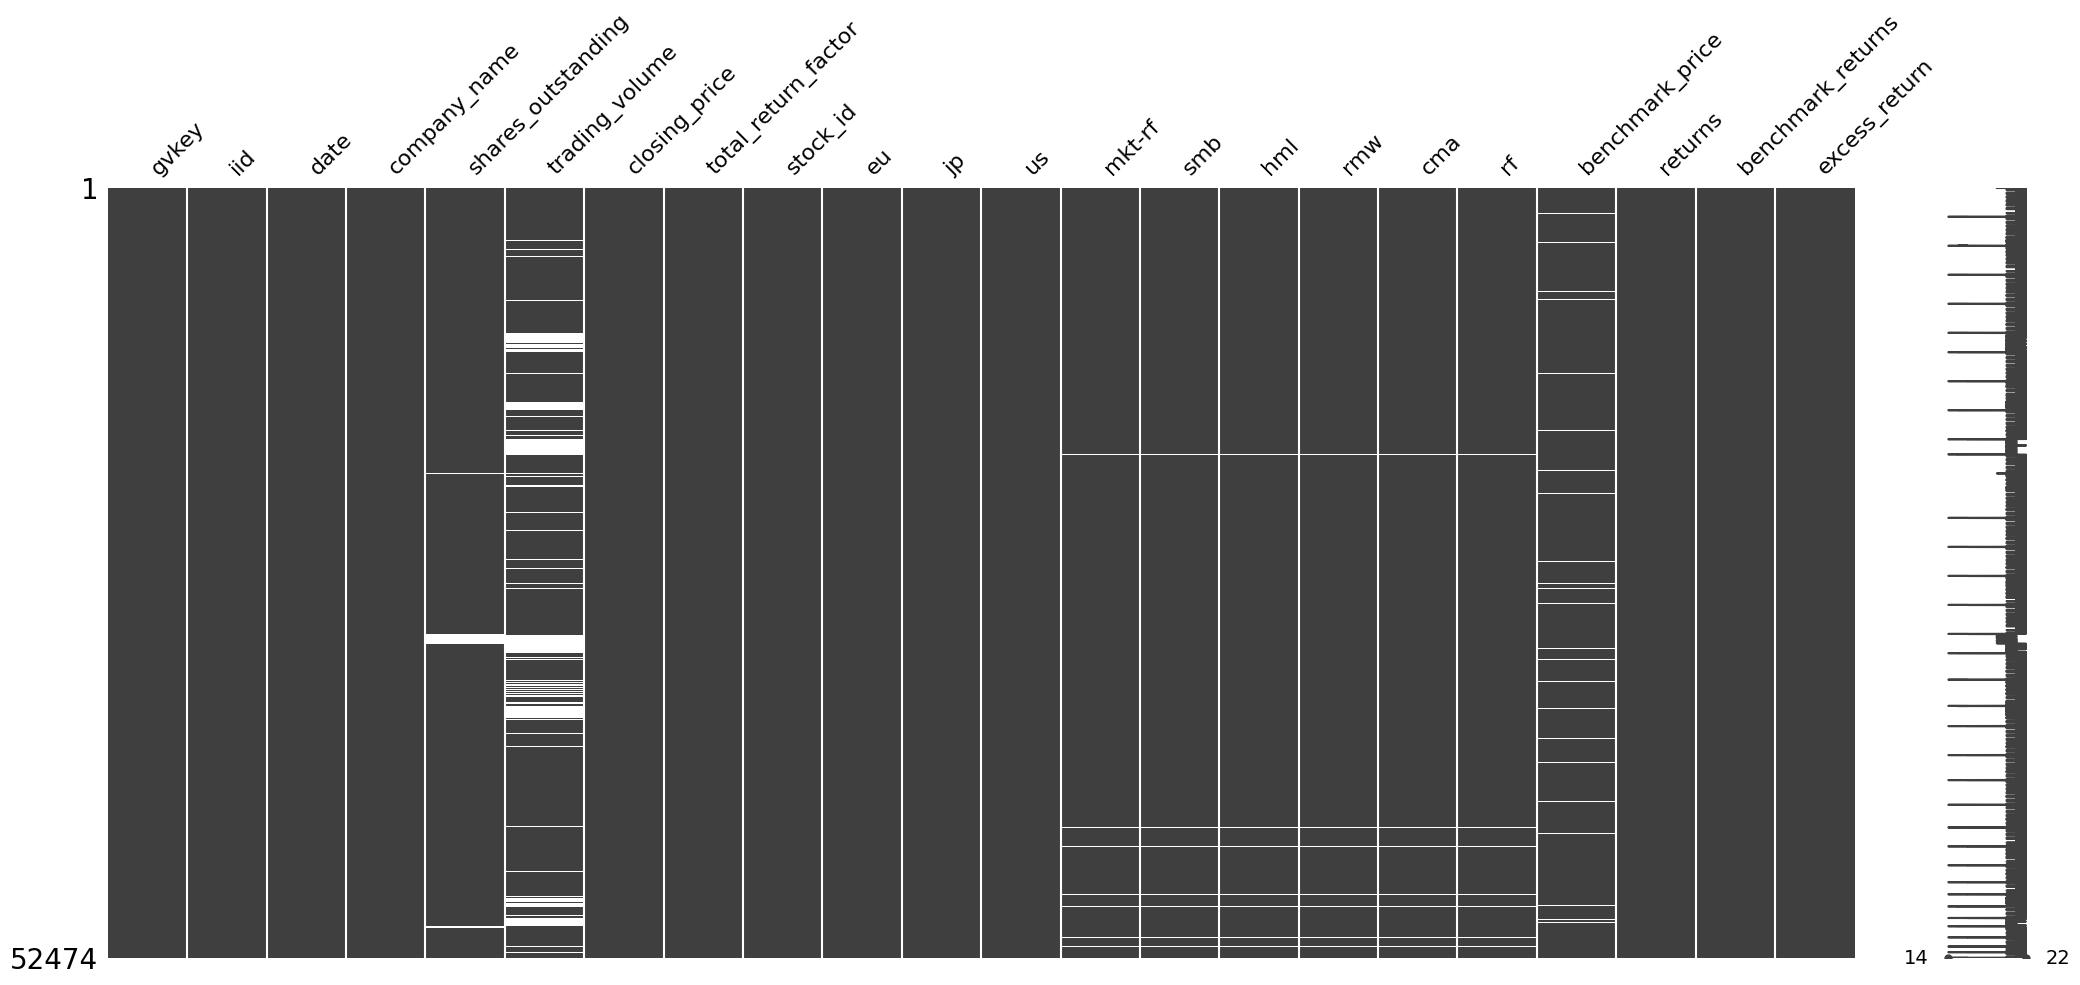

In [2549]:
# Plot missing values for eu.
%matplotlib inline

msno.matrix(stock_data_ff_stoxx_eu_df)

`shares_outstanding`, the missing values for the FF factors and `benchmark_price` can be filled with the last known value.

In [2550]:
# Fill missing values for shares_outstanding, Mkt-RF, SMB, HML, RMW, CMA, RF and benchmark_price.
stock_data_ff_stoxx_eu_df['shares_outstanding'] = stock_data_ff_stoxx_eu_df['shares_outstanding'].replace(np.nan).ffill()
stock_data_ff_stoxx_eu_df['benchmark_price'] = stock_data_ff_stoxx_eu_df['benchmark_price'].replace(np.nan).ffill()
stock_data_ff_stoxx_eu_df['mkt-rf'] = stock_data_ff_stoxx_eu_df['mkt-rf'].replace(np.nan).ffill()
stock_data_ff_stoxx_eu_df['smb'] = stock_data_ff_stoxx_eu_df['smb'].replace(np.nan).ffill()
stock_data_ff_stoxx_eu_df['hml'] = stock_data_ff_stoxx_eu_df['hml'].replace(np.nan).ffill()
stock_data_ff_stoxx_eu_df['rmw'] = stock_data_ff_stoxx_eu_df['rmw'].replace(np.nan).ffill()
stock_data_ff_stoxx_eu_df['cma'] = stock_data_ff_stoxx_eu_df['cma'].replace(np.nan).ffill()
stock_data_ff_stoxx_eu_df['rf'] = stock_data_ff_stoxx_eu_df['rf'].replace(np.nan).ffill()


<Axes: >

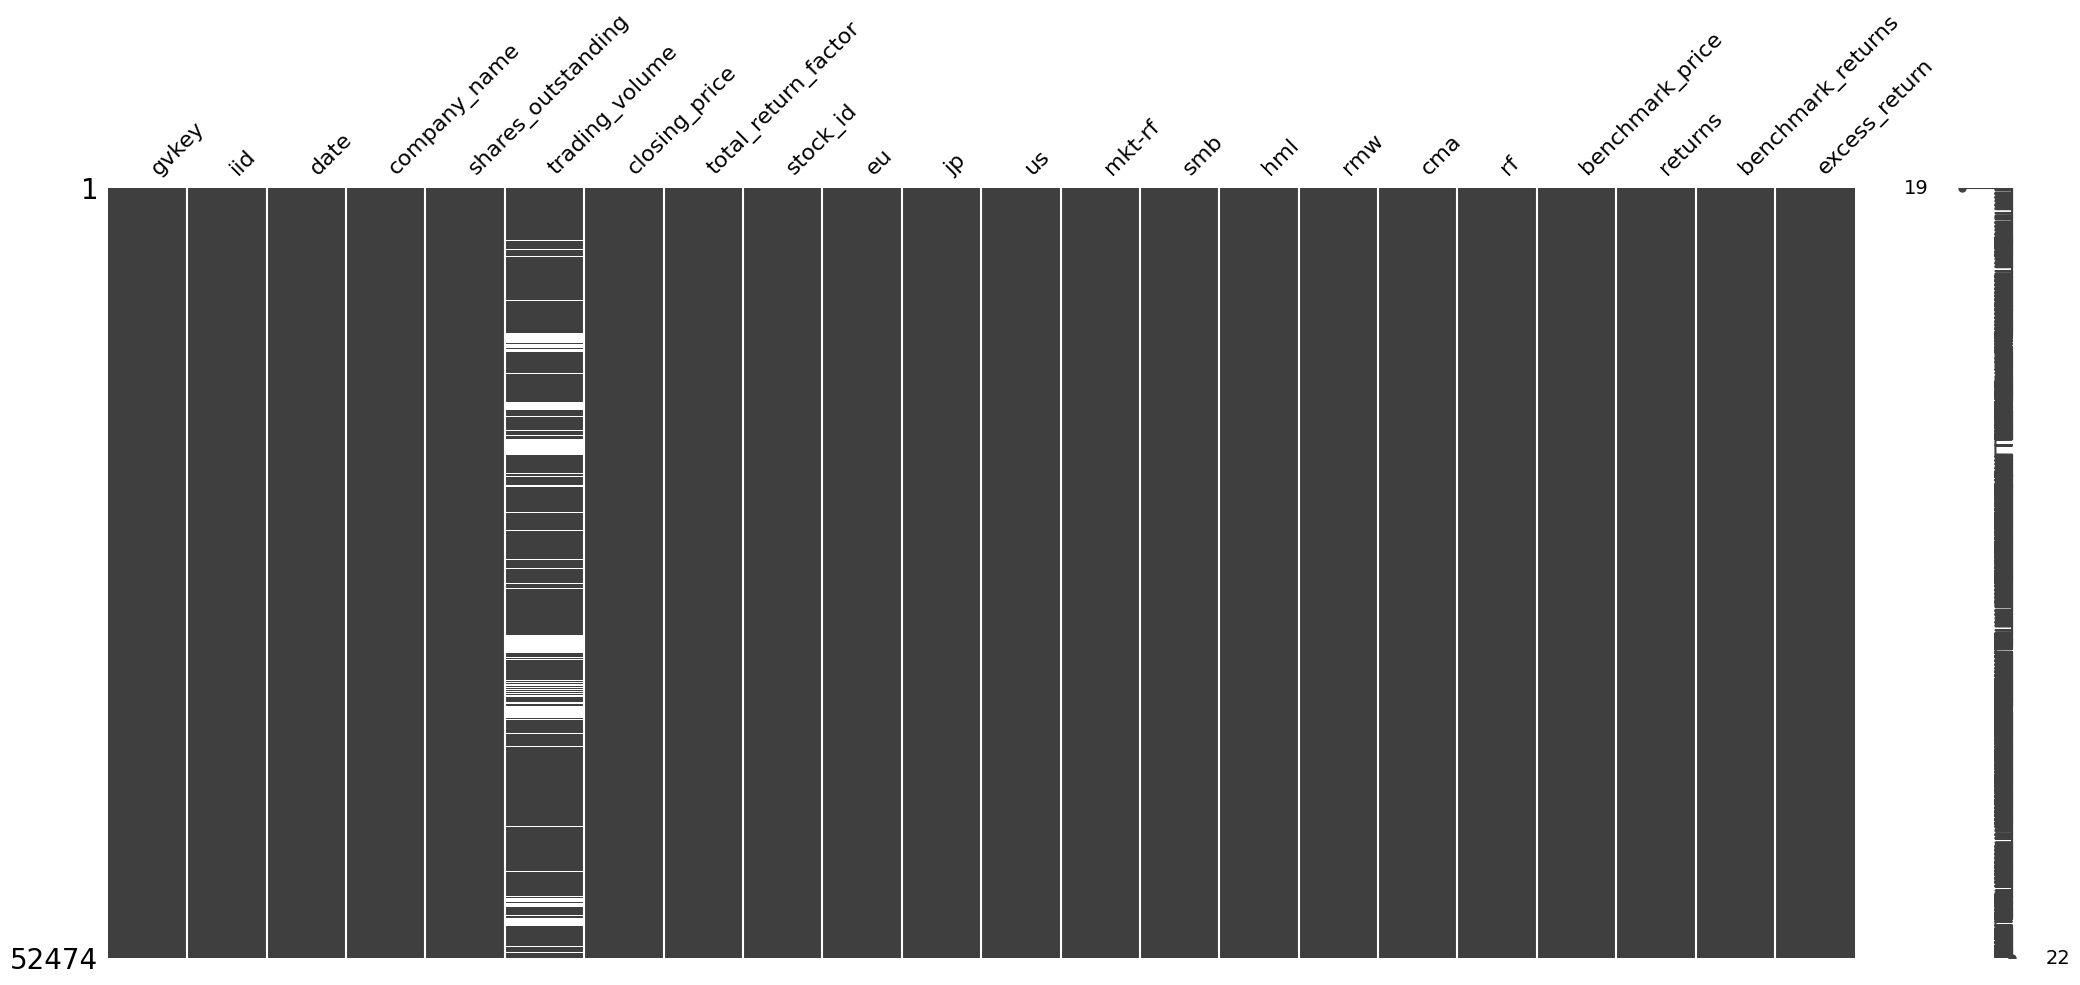

In [2551]:
# Check missing values plot after filling in missing values.
%matplotlib inline

msno.matrix(stock_data_ff_stoxx_eu_df)

<Axes: >

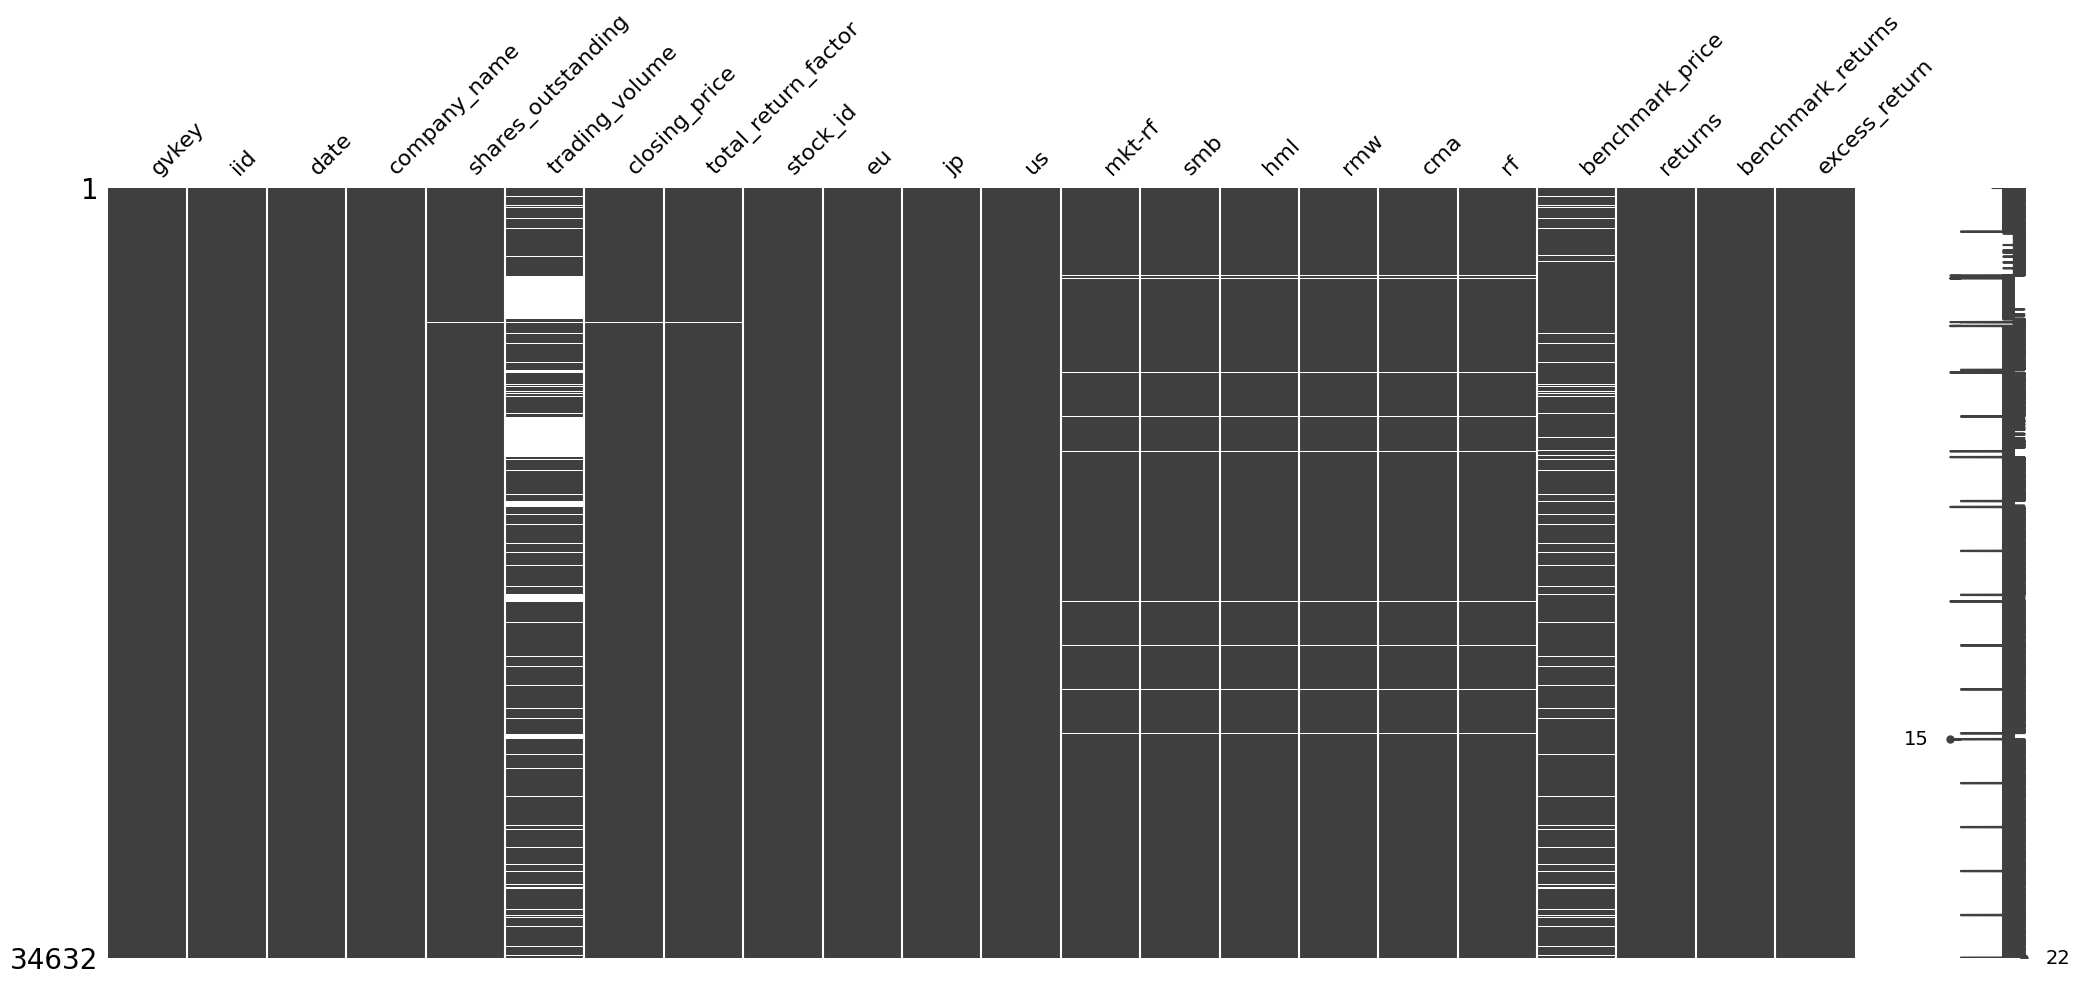

In [2553]:
# Plot missing values for jp.
%matplotlib inline

msno.matrix(stock_data_ff_topix_jp_df)

`shares_outstanding`, `closing_price`, `total_return_factor`, the missing values for the FF factors and `benchmark_price` can be filled with the last known value.

In [2554]:
# Fill missing values for shares_outstanding, closing_price, total_return_factor, Mkt-RF, SMB, HML, RMW, CMA, RF and benchmark_price.
stock_data_ff_topix_jp_df['shares_outstanding'] = stock_data_ff_topix_jp_df['shares_outstanding'].replace(np.nan).ffill()
stock_data_ff_topix_jp_df['total_return_factor'] = stock_data_ff_topix_jp_df['total_return_factor'].replace(np.nan).ffill()
stock_data_ff_topix_jp_df['closing_price'] = stock_data_ff_topix_jp_df['closing_price'].replace(np.nan).ffill()
stock_data_ff_topix_jp_df['benchmark_price'] = stock_data_ff_topix_jp_df['benchmark_price'].replace(np.nan).ffill()
stock_data_ff_topix_jp_df['mkt-rf'] = stock_data_ff_topix_jp_df['mkt-rf'].replace(np.nan).ffill()
stock_data_ff_topix_jp_df['smb'] = stock_data_ff_topix_jp_df['smb'].replace(np.nan).ffill()
stock_data_ff_topix_jp_df['hml'] = stock_data_ff_topix_jp_df['hml'].replace(np.nan).ffill()
stock_data_ff_topix_jp_df['rmw'] = stock_data_ff_topix_jp_df['rmw'].replace(np.nan).ffill()
stock_data_ff_topix_jp_df['cma'] = stock_data_ff_topix_jp_df['cma'].replace(np.nan).ffill()
stock_data_ff_topix_jp_df['rf'] = stock_data_ff_topix_jp_df['rf'].replace(np.nan).ffill()

<Axes: >

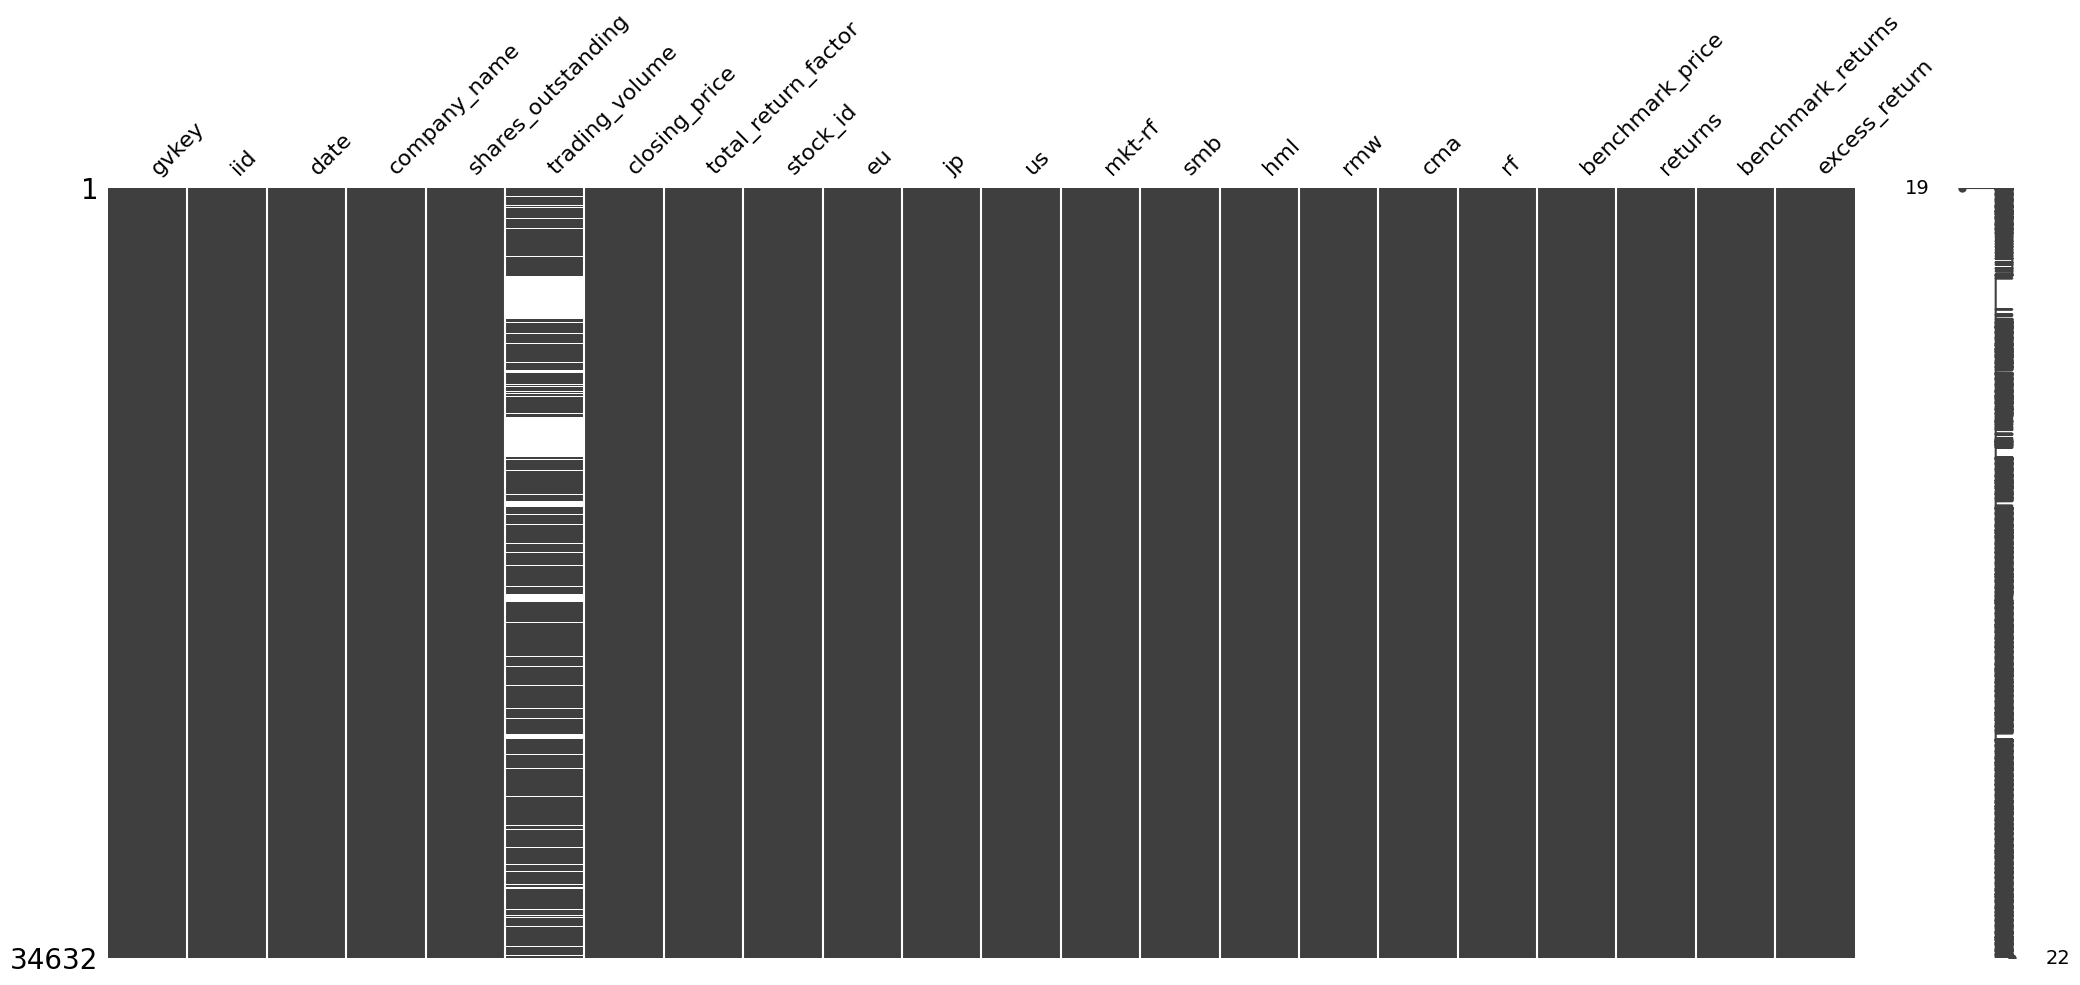

In [2555]:
# Check missing values plot after filling in missing values.
%matplotlib inline

msno.matrix(stock_data_ff_topix_jp_df)

<Axes: >

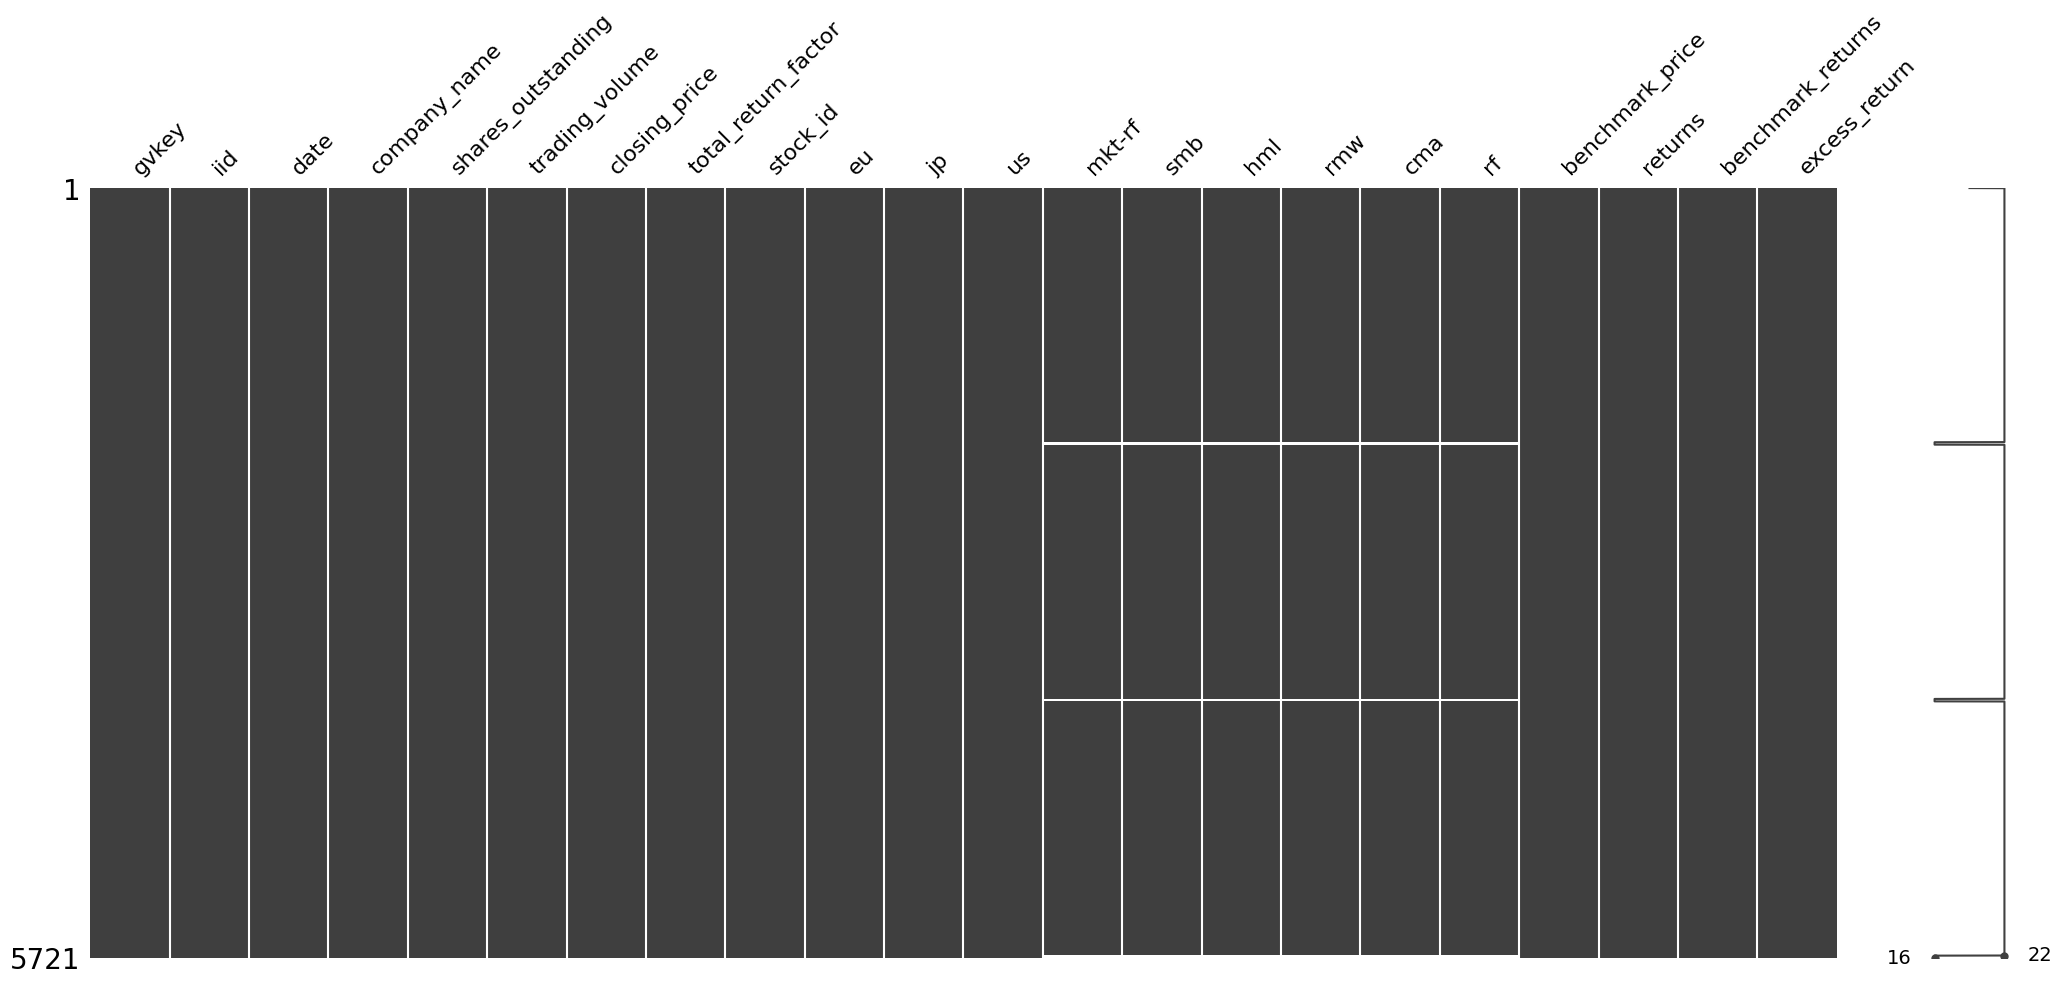

In [2556]:
# Plot missing values for us.
%matplotlib inline

msno.matrix(stock_data_ff_nasdaq_us_df[stock_data_ff_nasdaq_us_df['us']])

Missing values for the FF factors can be filled with the last known value.

In [2557]:
# Fill in missing data for FF factors.
stock_data_ff_nasdaq_us_df['mkt-rf'] = stock_data_ff_nasdaq_us_df['mkt-rf'].replace(np.nan).ffill()
stock_data_ff_nasdaq_us_df['smb'] = stock_data_ff_nasdaq_us_df['smb'].replace(np.nan).ffill()
stock_data_ff_nasdaq_us_df['hml'] = stock_data_ff_nasdaq_us_df['hml'].replace(np.nan).ffill()
stock_data_ff_nasdaq_us_df['rmw'] = stock_data_ff_nasdaq_us_df['rmw'].replace(np.nan).ffill()
stock_data_ff_nasdaq_us_df['cma'] = stock_data_ff_nasdaq_us_df['cma'].replace(np.nan).ffill()
stock_data_ff_nasdaq_us_df['rf'] = stock_data_ff_nasdaq_us_df['rf'].replace(np.nan).ffill()


<Axes: >

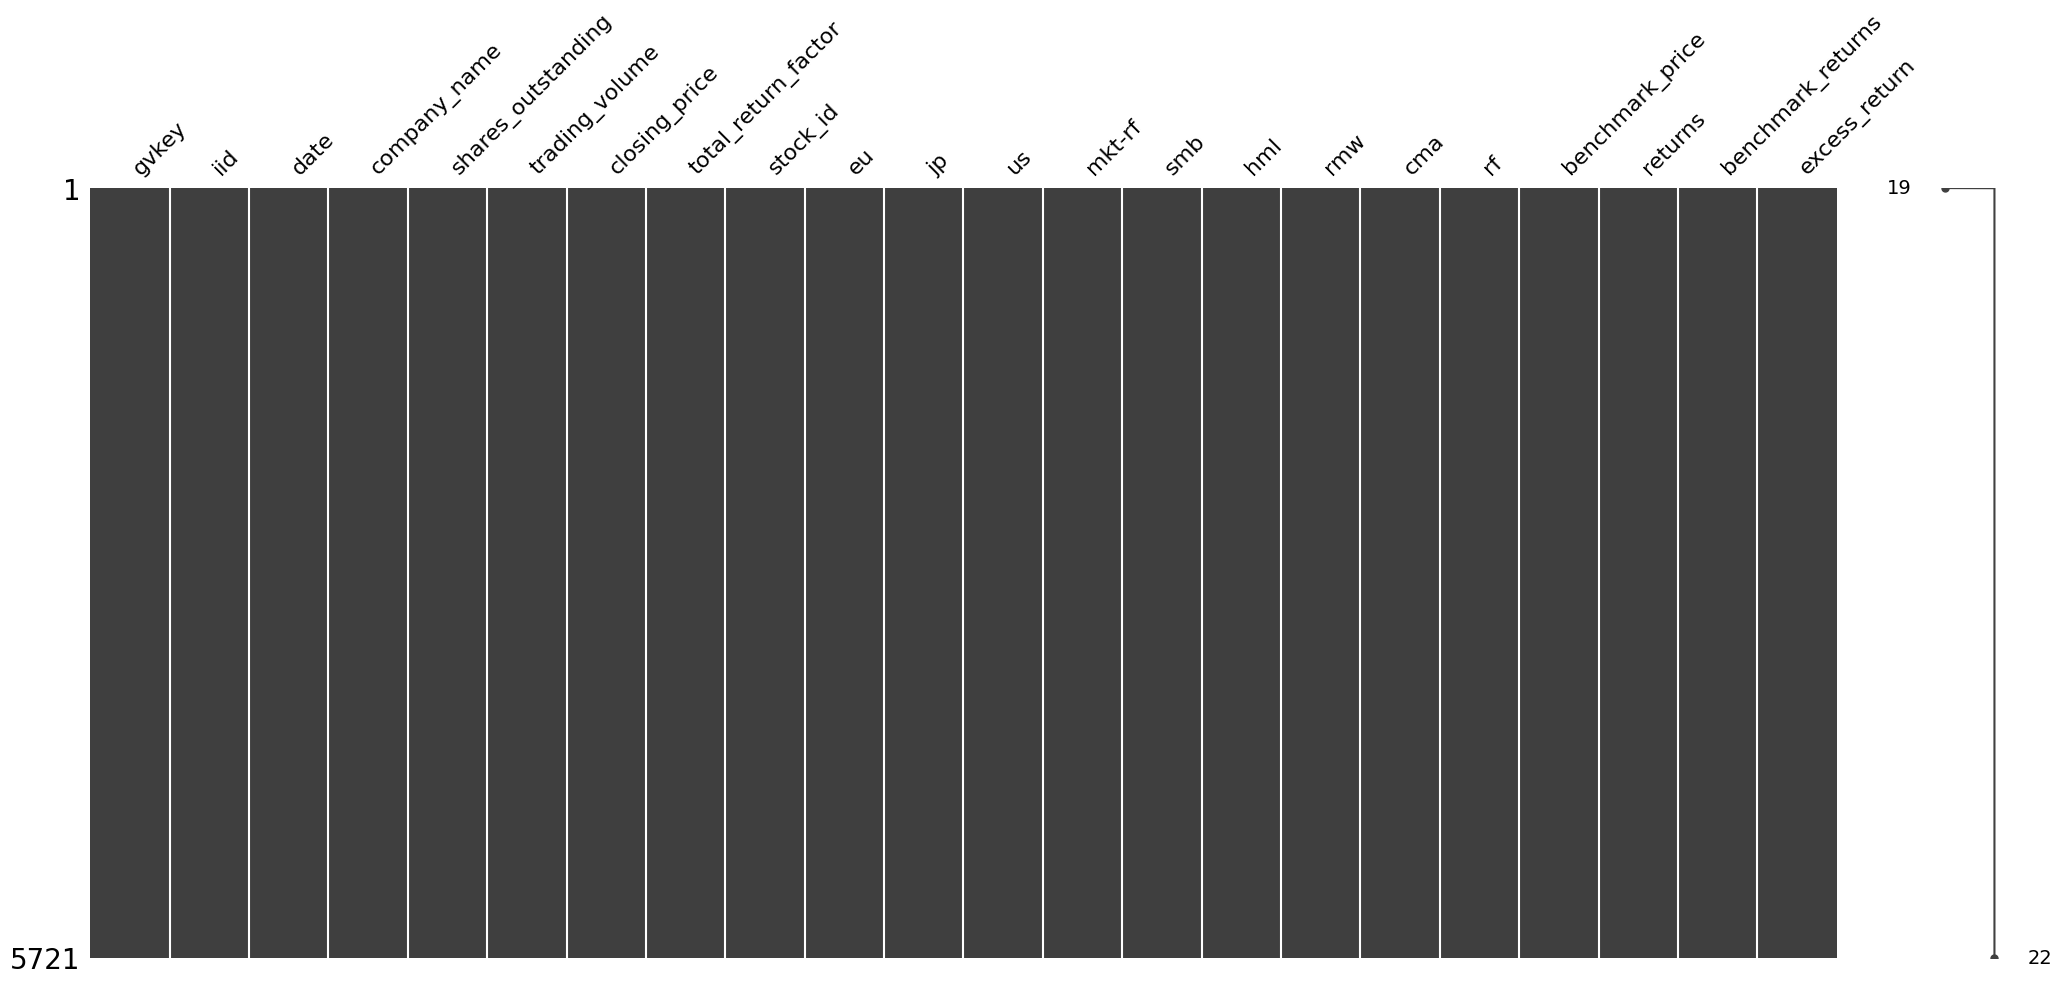

In [2558]:
# Check missing values plot after filling in missing values.
%matplotlib inline

msno.matrix(stock_data_ff_nasdaq_us_df)

In [2559]:
# Concat three region subset datasets.
datasets = [
    stock_data_ff_stoxx_eu_df,
    stock_data_ff_topix_jp_df,
    stock_data_ff_nasdaq_us_df
    ]
stock_ff_index_df = pd.concat(datasets)
stock_ff_index_df.head()

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,total_return_factor,stock_id,eu,...,mkt-rf,smb,hml,rmw,cma,rf,benchmark_price,returns,benchmark_returns,excess_return
0,212596,01W,2015-10-01,UBI SOFT ENTERTAINMENT SA,111218465.0,506501.0,18.420,1.008395,FR0000054470,True,...,-0.29,0.52,0.24,-0.11,0.22,0.0,308.80,NaN,NaN,NaN
1,212596,01W,2015-10-02,UBI SOFT ENTERTAINMENT SA,111218465.0,217260.0,18.155,1.008395,FR0000054470,True,...,0.93,-0.36,0.14,-0.25,0.22,0.0,310.56,-0.014387,0.005699,-0.020086
2,212596,01W,2015-10-05,UBI SOFT ENTERTAINMENT SA,111218465.0,267647.0,18.355,1.008395,FR0000054470,True,...,2.37,-1.31,0.43,-0.20,0.06,0.0,319.53,0.011016,0.028883,-0.017867
3,212596,01W,2015-10-06,UBI SOFT ENTERTAINMENT SA,111218465.0,984676.0,19.900,1.008395,FR0000054470,True,...,1.33,-0.10,0.66,0.04,0.05,0.0,321.06,0.084173,0.004788,0.079385
4,212596,01W,2015-10-07,UBI SOFT ENTERTAINMENT SA,111218465.0,740257.0,20.120,1.008395,FR0000054470,True,...,-0.07,0.07,1.52,-0.54,0.56,0.0,319.89,0.011055,-0.003644,0.014699


In [2560]:
test = stock_ff_index_df.groupby(['eu'])
test.head()

,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,total_return_factor,stock_id,eu,...,mkt-rf,smb,hml,rmw,cma,rf,benchmark_price,returns,benchmark_returns,excess_return
0,212596,01W,2015-10-01,UBI SOFT ENTERTAINMENT SA,1.112185e+08,506501.0,18.420,1.008395,FR0000054470,True,...,-0.29,0.52,0.24,-0.11,0.22,0.0,308.80,NaN,NaN,NaN
1,212596,01W,2015-10-02,UBI SOFT ENTERTAINMENT SA,1.112185e+08,217260.0,18.155,1.008395,FR0000054470,True,...,0.93,-0.36,0.14,-0.25,0.22,0.0,310.56,-0.014387,0.005699,-0.020086
2,212596,01W,2015-10-05,UBI SOFT ENTERTAINMENT SA,1.112185e+08,267647.0,18.355,1.008395,FR0000054470,True,...,2.37,-1.31,0.43,-0.20,0.06,0.0,319.53,0.011016,0.028883,-0.017867
3,212596,01W,2015-10-06,UBI SOFT ENTERTAINMENT SA,1.112185e+08,984676.0,19.900,1.008395,FR0000054470,True,...,1.33,-0.10,0.66,0.04,0.05,0.0,321.06,0.084173,0.004788,0.079385
4,212596,01W,2015-10-07,UBI SOFT ENTERTAINMENT SA,1.112185e+08,740257.0,20.120,1.008395,FR0000054470,True,...,-0.07,0.07,1.52,-0.54,0.56,0.0,319.89,0.011055,-0.003644,0.014699
0,9818,01W,2015-10-01,SONY GROUP CORPORATION,1.262162e+09,12208200.0,2996.000,1.273351,JP3435000009,False,...,2.07,-1.08,0.10,0.27,-0.32,0.0,1363.43,NaN,NaN,NaN
1,9818,01W,2015-10-02,SONY GROUP CORPORATION,1.262162e+09,9628600.0,3094.000,1.273351,JP3435000009,False,...,0.14,0.13,-0.25,0.23,-0.50,0.0,1365.57,-0.014387,0.005699,-0.020086
2,9818,01W,2015-10-05,SONY GROUP CORPORATION,1.262162e+09,8807600.0,3142.000,1.273351,JP3435000009,False,...,0.87,-0.35,-0.82,0.16,-0.22,0.0,1383.80,0.011016,0.028883,-0.017867
3,9818,01W,2015-10-06,SONY GROUP CORPORATION,1.262162e+09,6426700.0,3156.000,1.273351,JP3435000009,False,...,1.03,-0.19,0.30,0.10,0.00,0.0,1395.07,0.084173,0.004788,0.079385
4,9818,01W,2015-10-07,SONY GROUP CORPORATION,1.262162e+09,6163800.0,3205.000,1.273351,JP3435000009,False,...,1.23,-0.52,1.09,-0.34,-0.37,0.0,1411.76,0.011055,-0.003644,0.014699


Now that the financial data is joined into a single dataset we only need to handle missing values.

<Axes: >

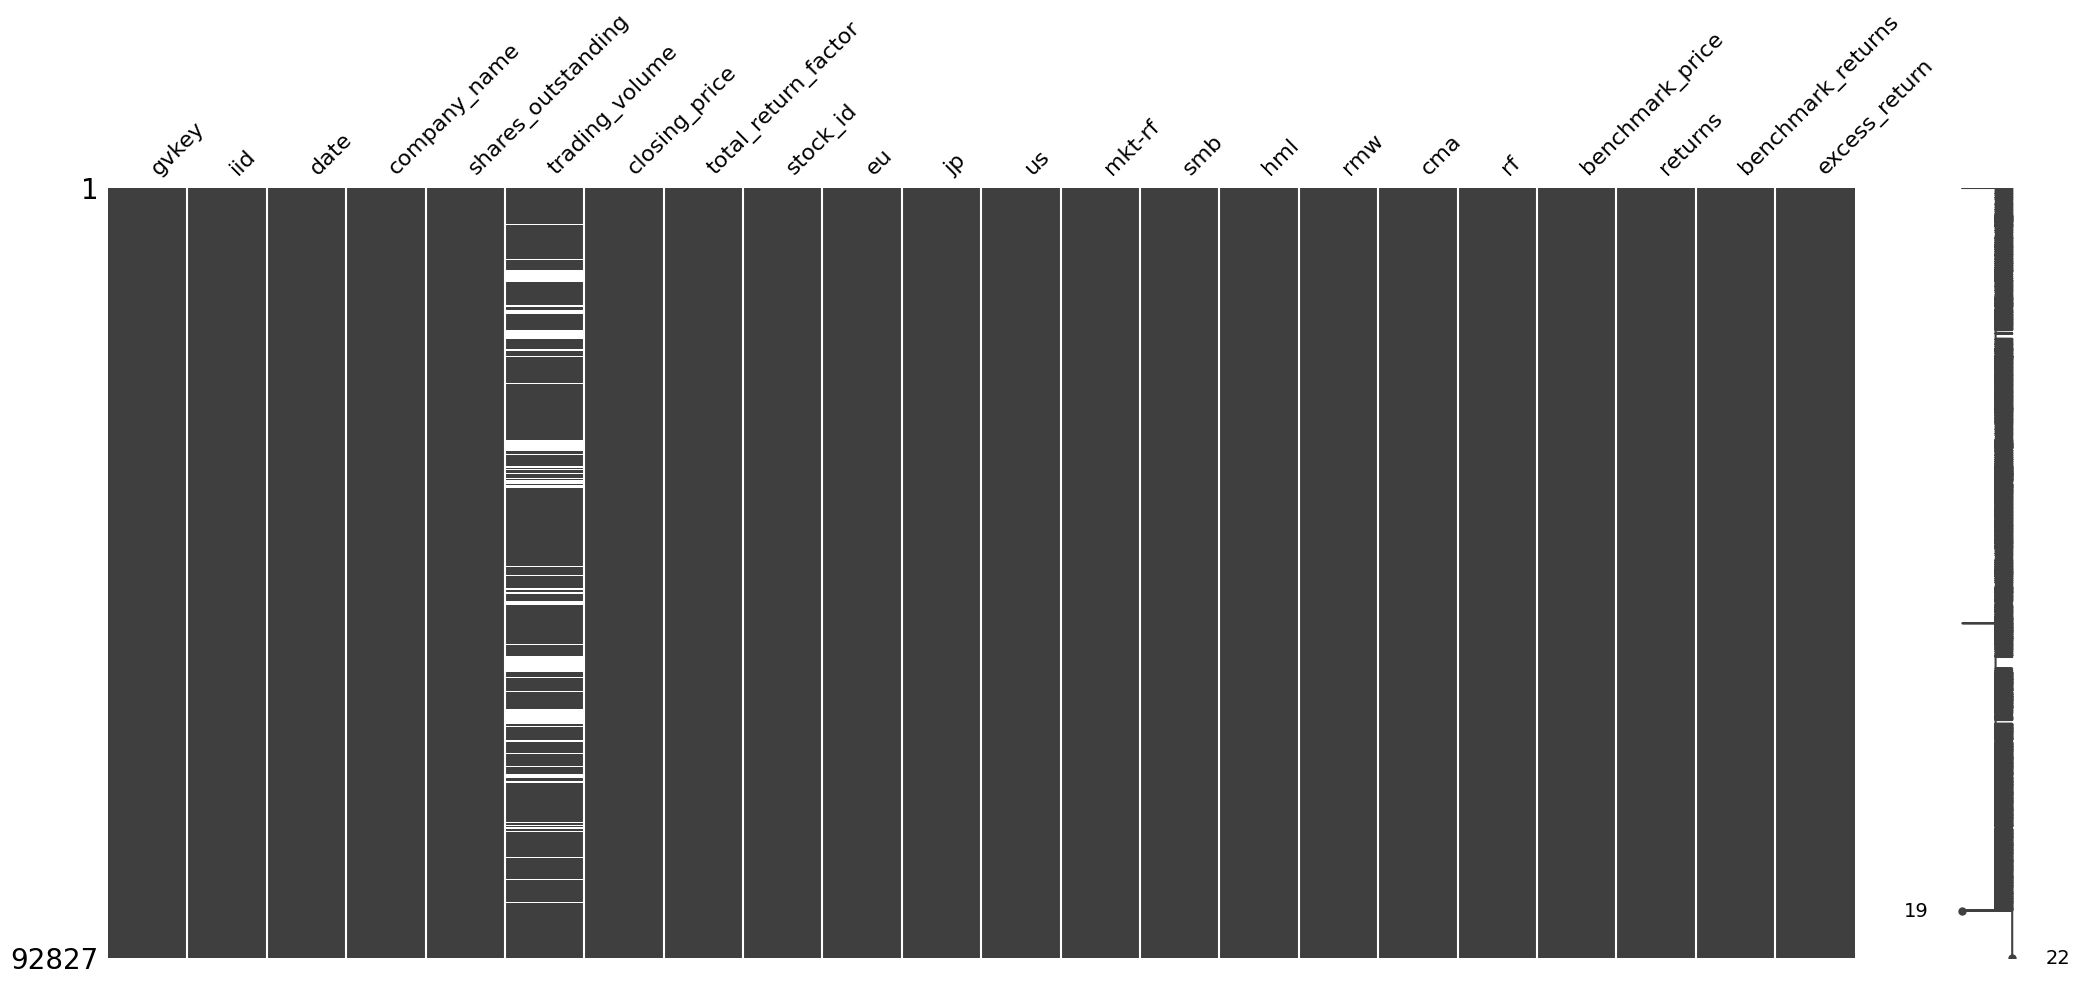

In [2561]:
# Check missing data for complete financial dataset.
%matplotlib inline

msno.matrix(stock_ff_index_df)

The financial data is now clean and ready for use. Note that trading volume has quite a bit of missing data and this has been left as is for fear of interpolation methods over so many observations corrupting the statistical results. Most days will likely be discarded and trading volume is kept in for now (as is) in the hope that the data is available for the observation days chosen due to game releases.

In [2562]:
stock_ff_index_df.to_csv('financial_data_clean.csv')